## Libraries anf functions

In [ ]:
import csv
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.stats import wilcoxon
import pickle
import plotly.express as px
from csv import DictWriter
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
import imblearn
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
import gc
import warnings
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from sklearn.metrics import matthews_corrcoef
import torch
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler, TensorDataset
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from numpy import asarray,savez_compressed
pd.set_option("display.max_rows", None, "display.max_columns", None)
!pip install -q SentencePiece transformers
from transformers import AdamW, get_cosine_schedule_with_warmup, get_linear_schedule_with_warmup, T5EncoderModel, T5Tokenizer
import torch.nn as nn
from torch.optim import lr_scheduler
from torch.nn.utils.rnn import pad_sequence
import requests
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
from sklearn import metrics
#from torch.utils import data
import re
import os
!pip install Biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 119.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 118.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.3 MB/s eta 0:00:00


In [ ]:
!pip install evcouplings

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.9/281.9 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.6/485.6 kB 17.4 MB/s eta 0:00:00
  Created wheel for evcouplings: filename=evcouplings-0.1.1-py3-none-any.whl size=269588 sha256=dbf4895e6a7f742252e092e9dc3a2834ff7a382f215a94150d7b021043e6d020
  Stored in directory: /root/.cache/pip/wheels/05/ae/c1/dd16d1fff530b1da434d0c0f2ca93b3bd2b8eb7410f9ce70b0
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2950 sha256=979e46264c2da24790401b0f0e658749a09e038afe83a58d1a88e9b5b14da792
  Stored in directory: /root/.cache/pip/wheels/c8/9c/85/72901eb50bc4bc6e3b2629378d172384ea3dfd19759c77fd2c
Successfully built evcouplings sklearn


In [ ]:
# conflict between python 3.10 and collections. I have to substitute from collections import Iterable with from collections.abc import Iterable on:
# /usr/local/lib/python3.10/dist-packages/evcouplings/align/protocol.py, /usr/local/lib/python3.10/dist-packages/evcouplings/couplings/mapping.py and /usr/local/lib/python3.10/dist-packages/evcouplings/couplings/model.py
#from collections import OrderedDict
#from evcouplings.align import Alignment, map_matrix, read_fasta

In [ ]:
def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

def msa_protocol(name_msa_file):
  ### name_msa_file: path to msa fime of gene
  ### return: alignment of gene

  with open(name_msa_file, "r") as infile:
    #seqs = OrderedDict()
    next(infile)

    #for i, (seq_id, seq) in enumerate(read_fasta(infile)):
    proper_infile = read_a3m(infile, inserts = "delete") # convert from a3m to a2m
    #seq = seq.replace(".", "")
    # seqs[seq_id] = seq
    #n_items = take(n, seqs.items())

    #aln = Alignment.from_file(proper_infile, format="fasta")
    aln = Alignment.from_dict(proper_infile)

  # Sequence length and number of sequences
  print(f"alignment is of length {aln.L} and has {aln.N} sequences")

  # Protocol Hopf
  # calculate the percent identity of every sequence in the alignment to the first sequence
  ident_perc = aln.identities_to(aln.matrix[0])
  ident_perc_list = ident_perc.tolist()

  # keep identifiers with > 50 percentage identity and colunns with at least 70% occupancy
  index_keep = []
  for i, iden in enumerate(ident_perc_list):
    if iden > 0.5: # 0.5= sequences with at least 50% of identity to the frst sequence are kept
      index_keep.append(i)

  #use the "count" method of the class  -  Percentage of gaps
  maximum1 = aln.count(axis="seq",char="-")#.argmax()

  filtered_ind = [i for i in range(len(maximum1)) if maximum1[i] <= 0.3] # 0.3 30% of gaps
  sequences_to_keep = intersection(index_keep, filtered_ind) # keep indeces that satisfy both conditions

  selection_index = sequences_to_keep
  aln_subsection = aln.select(sequences=selection_index)
  print(f"the new alignment has {aln_subsection.N} sequences")

  # if remaining sequences in MSA < 15 redo the process with less strict filtering
  if aln_subsection.N <15:
    index_keep = []
    for i, iden in enumerate(ident_perc_list):
      #if iden > 0.05: # 0.3= sequences with at least 5% of identity to the frst sequence are kept
      if iden > 0.27: # 0.3= sequences with at least 10% of identity to the frst sequence are kept
        index_keep.append(i)
    filtered_ind = [i for i in range(len(maximum1)) if maximum1[i] <= 0.7] # max 60% of gaps
    sequences_to_keep = intersection(index_keep, filtered_ind) # keep indeces that satisfy both conditions
    selection_index = sequences_to_keep
    aln_subsection = aln.select(sequences=selection_index)

  if aln_subsection.N <15:
    index_keep = []
    for i, iden in enumerate(ident_perc_list):
      #if iden > 0.05: # 0.3= sequences with at least 5% of identity to the frst sequence are kept
      if iden > 0.2: # 0.3= sequences with at least 20% of identity to the frst sequence are kept
        index_keep.append(i)
    filtered_ind = [i for i in range(len(maximum1)) if maximum1[i] <= 0.7] # max 60% of gaps
    sequences_to_keep = intersection(index_keep, filtered_ind) # keep indeces that satisfy both conditions
    selection_index = sequences_to_keep
    aln_subsection = aln.select(sequences=selection_index)
  #if aln_subsection.N >5000:
  #  index_keep = []
  #  for i, iden in enumerate(ident_perc_list):
  #    if iden > 0.6: # 0.4= sequences with at least 30% of identity to the frst sequence are kept
  #      index_keep.append(i)
  #  filtered_ind = [i for i in range(len(maximum1)) if maximum1[i] <= 0.2] # 0.6 60% of gaps
  #  sequences_to_keep = intersection(index_keep, filtered_ind) # keep indeces that satisfy both conditions
  #  selection_index = sequences_to_keep
  #  aln_subsection = aln.select(sequences=selection_index)


  #use the "count" method of the class  -  Percentage of gaps
  #maximum1 = aln.count(axis="seq",char="-")#.argmax()
  #filtered_ind = [i for i in range(len(maximum1)) if maximum1[i] <= 0.3] # 0.6 60% of gaps
  print(f"the new alignment has {aln_subsection.N} sequences")

  return aln_subsection

def read_a3m(fileobj, inserts="first"):
    """
    Read an alignment in compressed a3m format and expand
    into a2m format.
    .. note::
        this function is currently not able to keep inserts in all the sequences
    ..todo::
        implement this
    Parameters
    ----------
    fileobj : file-like object
        A3M alignment file
    inserts : {"first", "delete"}
        Keep inserts in first sequence, or delete
        any insert column and keep only match state
        columns.
    Returns
    -------
    OrderedDict
        Sequences in alignment (key: ID, value: sequence),
        in order they appeared in input file
    Raises
    ------
    ValueError
        Upon invalid choice of insert strategy
    """
    seqs = OrderedDict()

    for i, (seq_id, seq) in enumerate(read_fasta(fileobj)):
        # remove any insert gaps that may still be in alignment
        # (just to be sure)
        seq = seq.replace(".", "")

        if inserts == "first":
            # define "spacing" of uppercase columns in
            # final alignment based on target sequence;
            # remaining columns will be filled with insert
            # gaps in the other sequences
            if i == 0:
                uppercase_cols = [
                    j for (j, c) in enumerate(seq)
                    if (c == c.upper() or c == "-")
                ]
                gap_template = np.array(["."] * len(seq))
                filled_seq = seq
            else:
                uppercase_chars = [
                    c for c in seq if c == c.upper() or c == "-"
                ]
                filled = np.copy(gap_template)
                filled[uppercase_cols] = uppercase_chars
                filled_seq = "".join(filled)

        elif inserts == "delete":
            # remove all lowercase letters and insert gaps .;
            # since each sequence must have same number of
            # uppercase letters or match gaps -, this gives
            # the final sequence in alignment
            seq = "".join([c for c in seq if c == c.upper() and c != "."])
        else:
            raise ValueError(
                "Invalid option for inserts: {}".format(inserts)
            )

        seqs[seq_id] = seq

    return seqs


In [ ]:
def clean_labels(val):
    if 'benign' in val:
        return 'benign'
    elif 'pathogenic' in val:
        return 'pathogenic'
    else:
        return 'VUS'

def cancer_labels(val):
    if 'cancer' in val:
        return 'cancer'
    else:
        return 'non_canceric'

In [ ]:
def init_weights(m):
    if type(m) == nn.Linear:
        #nn.init.normal_(m.weight, std=0.01)
        nn.init.xavier_normal_(m.weight)

    if type(m) == nn.LSTM:
      for param in m._flat_weights_names:
          if "weight" in param:
              nn.init.xavier_uniform_(m._parameters[param])

def unique(list1):

    # initialize a null list
    unique_list = []

    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)

    print(f'{len(unique_list)} unique transcripts')
    return unique_list

class ClassifierDataset(Dataset):

    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data

    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]

    def __len__ (self):
        return len(self.X_data)


def get_class_distribution_binary(obj):
    count_dict = {
        'Neutral': 0,
        'Deleterious': 0,
    }

    for i in obj:
        if i == 0:
            count_dict['Neutral'] += 1
        elif i == 1:
            count_dict['Deleterious'] += 1

        else:
            print("Check classes.")

    return count_dict


def Average(lst):
  return sum(lst) /len(lst)



def dataset_with_indices(cls):
    """
    Modifies the given Dataset class to return a tuple data, target, index
    instead of just data, target.
    """

    def __getitem__(self, index):
        data, target = cls.__getitem__(self, index)
        return data, target, index

    return type(cls.__name__, (cls,), {
        '__getitem__': __getitem__,
    })


DWithInd = dataset_with_indices(torch.utils.data.TensorDataset)



class Classifier2L(nn.Module):
    def __init__(self, hidden, hidden2, dropout=0):
        super(Classifier2L, self).__init__()
        self.hidden = hidden
        self.hidden2 = hidden2
        self.num_feature = 2200 #1600
        self.dropout = dropout
        self.batchnorm1 = nn.BatchNorm1d(self.hidden)
        self.batchnorm2 = nn.BatchNorm1d(self.hidden2)

        self.layer_1 = nn.Linear(self.num_feature,  self.hidden)
        self.layer_2 = nn.Linear( self.hidden, self.hidden2)
        self.layer_3 = nn.Linear( self.hidden2, 1)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x= self.dropout(x)
        x = self.relu(x)

        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x= self.dropout(x)

        x = self.layer_3(x)
        #x = self.batchnorm2(x)
        #x = self.sigmoid(x)

        return x


    def compute_l1_loss(self, w):
        return torch.abs(w).sum()

    def compute_l2_loss(self, w):
        return torch.square(w).sum()


# implementation of a single testing epoch
def test_epoch(net, loader, loss_fn):

    # set the network in evaluation mode
    net.eval()

    # keep track of the loss
    loss_cum = 0
    cnt = 0
    num_correct_val = 0
    targets = []
    predictions = []
    with torch.no_grad():
      for i, data in enumerate(loader):

          x, y = data
          x = x.to(device)
          y = y.to(device)

          # feed the batch to the network and compute the outputs
          y_pred = net(x.float())
          #y_pred_sq = np.squeeze(y_pred) #add when using loss_fn: BCEloss()
          pred = torch.round(y_pred.squeeze())  # rounds to the nearest integer

          # compare predictions to true label
          #correct_tensor = pred.eq(y.float().view_as(pred))
          #correct = np.squeeze(correct_tensor.cpu().numpy())

          targets.extend(y.cpu().detach().numpy().tolist())
          predictions.extend(torch.sigmoid(y_pred).cpu().detach().numpy().tolist())

          #num_correct_val += np.sum(correct)
          # compare the outputs to the labels with the loss function
          #loss = loss_fn(y_pred_sq, y.float())  #ad|d when using loss_fn: BCEloss()
          loss = loss_fn(y_pred, y.float())

          # Specify L1 and L2 weights
          l1_weight = 0
          l2_weight = 0

          # Compute L1 and L2 loss component
          parameters = []
          for parameter in net.parameters():
              parameters.append(parameter.view(-1))
          l1 = l1_weight * net.compute_l1_loss(torch.cat(parameters))
          l2 = l2_weight * net.compute_l2_loss(torch.cat(parameters))

          # Add L1 and L2 loss components
          loss += l1
          loss += l2

          loss_cum += loss.data.cpu().numpy()
          cnt += 1

    # compute the average loss
    #len_trainx = len(loader) * len(y_pred)
    #mytest_acc = num_correct_val
    loss_avg = loss_cum / cnt
    predictions = np.array(predictions) >= 0.5
    mytest_acc  = (metrics.accuracy_score(targets, predictions)) *100
    total = cnt *len(y)

    return loss_avg, mytest_acc

# implementation of a single training epoch
def train_epoch_cross(net, loader, loss_fn, optimizer, scheduler):

    # set the network in training mode
    net.train()

    # keep track of the loss
    loss_cum = 0
    cnt = 0
    num_correct = 0
    targets = []
    predictions = []

    for i, data in enumerate(loader):

        # sample data
        x, y = data
        x = x.to(device)
        y = y.to(device)

        # set all gradients equal to zero
        net.zero_grad()

        # feed the batch to the network and compute the outputs
        y_pred = net(x)
        #y_pred_sq = np.squeeze(y_pred) # add when using loss_fn: BCEloss()

        pred = torch.round(y_pred.squeeze())  # rounds to the nearest integer

        # compare predictions to true label
        #correct_tensor = pred.eq(y.float().view_as(pred))
        #correct = np.squeeze(correct_tensor.cpu().numpy())
        #num_correct += np.sum(correct)
        targets.extend(y.cpu().detach().numpy().tolist())
        predictions.extend(torch.sigmoid(y_pred).cpu().detach().numpy().tolist())

        #predictions_round = [round(p) for p in predictions]
        #correct_tensor = predictions_round.eq(targets.float().view_as(predictions_round))

        #loss = loss_fn(y_pred_sq, y.float())  #add when using loss_fn: BCEloss()
        loss = loss_fn(y_pred, y.float())

        # Specify L1 and L2 weights
        l1_weight = 0
        l2_weight = 0

        # Compute L1 and L2 loss component
        parameters = []
        for parameter in net.parameters():
            parameters.append(parameter.view(-1))
        l1 = l1_weight * net.compute_l1_loss(torch.cat(parameters))
        l2 = l2_weight * net.compute_l2_loss(torch.cat(parameters))

        # Add L1 and L2 loss components
        loss += l1
        loss += l2

        loss_cum += loss.data.cpu().numpy()
        cnt += 1

        # backpropagate the gradients w.r.t. computed loss
        loss.backward()

        # apply one step in the optimization
        optimizer.step()
        scheduler.step()

        #break #for training one batch

    # compute the average loss
    #mytrain_acc = num_correct
    loss_avg = loss_cum / cnt

    #predictions = np.array(predictions) >= 0.5
    predictions = [1 if p[0] > 0.5 else 0 for p in predictions]
    mytrain_acc  = metrics.accuracy_score(targets, predictions)   *100
    #mytrain_acc = (num_correct/ (len(y)*cnt)) *100
    return loss_avg, mytrain_acc

def loss_fn(outputs, targets):
  return nn.BCEWithLogitsLoss()(outputs, targets.view(-1, 1))


def train_net_cross(net, train_loader, val_loader, loss_fn, optimizer, epochs , scheduler):

    # transfer the network to the GPU
    net = net.to(device)

    train_loss = np.zeros((epochs))
    test_loss = np.zeros((epochs))
    train_acc = np.zeros((epochs))
    train_acc_alt = np.zeros((epochs))

    test_acc = np.zeros((epochs))
    test_acc_alt = np.zeros((epochs))

    print("Begin training.")

    for epoch in tqdm(range(epochs)):

        # training
        train_loss[epoch], train_acc[epoch] = train_epoch_cross(net, train_loader, loss_fn, optimizer, scheduler)
        #predictions, outputs = eval(net, train_loader)
        #train_acc_alt[epoch] = metrics.accuracy_score(outputs, predictions)

        # validation
        test_loss[epoch], test_acc[epoch] = test_epoch(net, val_loader, loss_fn)
        #predictions, outputs = eval(net, val_loader)
        #test_acc_alt[epoch] = metrics.accuracy_score(outputs, predictions)

        print('Epoch %5d - Train loss: %.6f - Train accuracy: %.6f - Test loss: %.6f - Test accuracy: %.6f'
             % (epoch, train_loss[epoch], train_acc[epoch], test_loss[epoch], test_acc[epoch]))

        #print('Epoch %5d - Train loss: %.6f - Train accuracy: %.6f'
        #    % (epoch, train_loss[epoch], train_acc[epoch]))# for training one batch

    return (train_loss, test_loss), (train_acc , test_acc)
    #return train_loss, train_acc # for training one batch

## Load protT5

In [ ]:
# Advanced
tokenizer = T5Tokenizer.from_pretrained("Rostlab/prot_t5_xl_uniref50", do_lower_case=False )
model = T5EncoderModel.from_pretrained("Rostlab/prot_t5_xl_uniref50")
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
model = model.eval()
gc.collect()

You are using the legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This means that tokens that come after special tokens will not be properly handled. We recommend you to read the related pull request available at https://github.com/huggingface/transformers/pull/24565


110

# TP53 / BRAF confidence score

## input TP53/BRAF Clinvar expert panel and multiple submitters annotations, check if mutation iscorrect and chech if D2D prediction is correct - not used anymore

In [ ]:
ar_clinvar = pd.read_csv('PTEN_expert_panel_multiple_submitters', delimiter = '\t', usecols=['Name', 'Gene(s)', 'Condition(s)' ,'Protein change', 'Clinical significance (Last reviewed)'])
ar_clinvar['label'] = ar_clinvar['Clinical significance (Last reviewed)'].apply(clean_labels)
ar_clinvar['condition'] = ar_clinvar['Condition(s)'].apply(cancer_labels)

ar_predictions = pd.read_csv('PTEN_d2d_results.csv', sep=',')

# for converting d2d_results to d2d_performance_vs_clinvar format
temp = ar_predictions.mutation.str.split(pat='_',expand=True)[0]
ar_predictions['uniprot id'] = temp
temp = ar_predictions.mutation.str.split(pat='_',expand=True)[1]
ar_predictions= ar_predictions.drop('mutation', axis=1)
ar_predictions['mutation']= temp
ar_predictions['AA_orig'] = ar_predictions['mutation'].str[:1]
ar_predictions['AA_targ'] = ar_predictions['mutation'].str[-1:]
ar_predictions['position'] = ar_predictions['mutation'].str[1:-1]
# drop original column
ar_predictions = ar_predictions.drop('mutation', axis=1)
ar_predictions = ar_predictions.rename(columns={"prediction": "D2D_prediction"})

correct, incorrect, vus_nb, count_mutations, incorrect_mutation, correct_mutation  = d2d_performance_vs_clinvar_correct(ar_predictions,ar_clinvar, False)

print(f'Correct labels for BRAF: {correct} out of {count_mutations-vus_nb} with known significance. Accuracy: {round(correct / (count_mutations-vus_nb),3)}')
print('--------------------------')
print('Inorrect labels for BRAF: ', incorrect)
print('--------------------------')
print(f'VUS labels for BRAF: {vus_nb}, VUS percentage in gene annotations {round(vus_nb/count_mutations,3)}')

In [ ]:
tp53_clinvar = pd.read_csv('TP53_expert_panel_multiple_submitters', delimiter='\t', usecols=['Name', 'Gene(s)', 'Condition(s)' ,'Protein change', 'Clinical significance (Last reviewed)'])
tp53_clinvar['label'] = tp53_clinvar['Clinical significance (Last reviewed)'].apply(clean_labels)
tp53_clinvar['condition'] = tp53_clinvar['Condition(s)'].apply(cancer_labels)

tp53_predictions = pd.read_csv('P04637_all_results2.csv')

In [ ]:
def d2d_performance_vs_clinvar_delete(d2d_predictions, clinvar_file, cancer_flag=False):
  if cancer_flag == True:
    clinvar_file = clinvar_file[clinvar_file['condition']=='cancer']
  d2d_predictions['conc_mutation'] = d2d_predictions['AA_orig'] + d2d_predictions['position'].astype(str) + d2d_predictions['AA_targ']
  correct, incorrect, vus_nb, count_mutations = 0,0,0,0
  incorrect_mutation, correct_mutation = [], []
  for i, mut in clinvar_file.iterrows():
    mutations = mut['Protein change'].split(', ')
    for mutation in mutations:
      temp = d2d_predictions[d2d_predictions['conc_mutation'] == mutation]
      if len(temp) >0:
        count_mutations+=1
        if (mut['label'] == 'benign' and float(temp['D2D_prediction']) <0.5) or (mut['label'] == 'pathogenic' and float(temp['D2D_prediction']) >=0.5) :
          correct+=1
          correct_mutation.append([mut['label'],temp['conc_mutation'].values[0]])
        elif (mut['label'] == 'pathogenic' and float(temp['D2D_prediction']) <0.5) or (mut['label'] == 'benign' and float(temp['D2D_prediction']) >=0.5):
          incorrect+=1
          incorrect_mutation.append([mut['label'],temp['conc_mutation'].values[0]])
        else:
          vus_nb+=1
  return correct, incorrect, vus_nb, count_mutations, incorrect_mutation, correct_mutation

In [ ]:
def AAconvert(AminoAcid):

  aa = {
      'Ala' : 'A',
      'Arg' : 'R',
      'Asn' : 'N',
      'Asp' : 'D',
      'Cys' : 'C',
      'Glu' : 'E',
      'Gln' : 'Q',
      'Gly' : 'G',
      'His' : 'H',
      'Ile' : 'I',
      'Leu' : 'L',
      'Lys' : 'K',
      'Met' : 'M',
      'Phe' : 'F',
      'Pro' : 'P',
      'Ser' : 'S',
      'Thr' : 'T',
      'Trp' : 'W',
      'Tyr' : 'Y',
      'Val' : 'V',
      'Ter' : '*'

  }
  return aa[AminoAcid]

def d2d_performance_vs_clinvar_correct(d2d_predictions, clinvar_file, cancer_flag=False):
  if cancer_flag == True:
    clinvar_file = clinvar_file[clinvar_file['condition']=='cancer']
  d2d_predictions['conc_mutation'] = d2d_predictions['AA_orig'] + d2d_predictions['position'].astype(str) + d2d_predictions['AA_targ']
  correct, incorrect, vus_nb, count_mutations = 0,0,0,0
  incorrect_mutation, correct_mutation = [], []
  for i, mut in clinvar_file.iterrows():
    #print(mut)
    mutations = mut['Name'].split('(p.')[1][:-1]
    mutation= AAconvert(mutations[:3])+ mutations[3:-3]+ AAconvert(mutations[-3:])

    temp = d2d_predictions[d2d_predictions['conc_mutation'] == mutation]
    if len(temp) >0:
      count_mutations+=1
      if (mut['label'] == 'benign' and float(temp['D2D_prediction']) <0.5) or (mut['label'] == 'pathogenic' and float(temp['D2D_prediction']) >=0.5) or  (mut['label'] == 'likely benign' and float(temp['D2D_prediction']) <0.5) or (mut['label'] == 'likely pathogenic' and float(temp['D2D_prediction']) >=0.5) :
        correct+=1
        correct_mutation.append([mut['label'],temp['conc_mutation'].values[0]])
      elif (mut['label'] == 'pathogenic' and float(temp['D2D_prediction']) <0.5) or (mut['label'] == 'benign' and float(temp['D2D_prediction']) >=0.5) or (mut['label'] == 'likely pathogenic' and float(temp['D2D_prediction']) <0.5) or (mut['label'] == 'likely benign' and float(temp['D2D_prediction']) >=0.5):
        incorrect+=1
        incorrect_mutation.append([mut['label'],temp['conc_mutation'].values[0]])
      else:
        vus_nb+=1
  return correct, incorrect, vus_nb, count_mutations, incorrect_mutation, correct_mutation

In [ ]:
correct, incorrect, vus_nb, count_mutations, incorrect_mutation, correct_mutation = d2d_performance_vs_clinvar_correct(tp53_predictions,tp53_clinvar, False)

print(f'Correct labels for TP53: {correct} out of {count_mutations-vus_nb} with known significance. Accuracy: {round(correct / (count_mutations-vus_nb),3)}')
print('--------------------------')
print('Inorrect labels for TP53: ', incorrect)
print('--------------------------')
print(f'VUS labels for TP53: {vus_nb}, VUS percentage in gene annotations {round(vus_nb/count_mutations,3)}')

In [ ]:
correct, incorrect, vus_nb, count_mutations, incorrect_mutation, correct_mutation = d2d_performance_vs_clinvar(tp53_predictions,tp53_clinvar, False)

print(f'Correct labels for TP53: {correct} out of {count_mutations-vus_nb} with known significance. Accuracy: {round(correct / (count_mutations-vus_nb),3)}')
print('--------------------------')
print('Inorrect labels for TP53: ', incorrect)
print('--------------------------')
print(f'VUS labels for TP53: {vus_nb}, VUS percentage in gene annotations {round(vus_nb/count_mutations,3)}')

In [ ]:
braf_clinvar = pd.read_csv('BRAF_expert_panel_multiple_submitters.csv', usecols=['Gene(s)', 'Condition(s)' ,'Protein change', 'Clinical significance (Last reviewed)'])
braf_clinvar['label'] = braf_clinvar['Clinical significance (Last reviewed)'].apply(clean_labels)
braf_clinvar['condition'] = braf_clinvar['Condition(s)'].apply(cancer_labels)

braf_predictions = pd.read_csv('P15056_all_results.csv', sep=',')

correct, incorrect, vus_nb, count_mutations, incorrect_mutation, correct_mutation = d2d_performance_vs_clinvar(braf_predictions,braf_clinvar, False)

print(f'Correct labels for BRAF: {correct} out of {count_mutations-vus_nb} with known significance. Accuracy: {round(correct / (count_mutations-vus_nb),3)}')
print('--------------------------')
print('Incorrect labels for BRAF: ', incorrect)
print('--------------------------')
print(f'VUS labels for BRAF: {vus_nb}, VUS percentage in gene annotations {round(vus_nb/count_mutations,3)}')

In [ ]:
predictions = pd.read_csv('TP53_formatted.csv', usecols=['score'])
predictions = predictions['score'].tolist()

In [ ]:
import pandas as pd

tp53 = pd.read_csv('TP53.csv')
mutation = tp53['mutation'].tolist()
prob_benign = tp53['prob_benign'].tolist()
prob_pathogenic  = tp53['prob_pathogenic'].tolist()
WT_thres = tp53['WT_thres'].tolist()
MUT_thres = tp53['MUT_thres'].tolist()

In [ ]:
tp = pd.DataFrame(list(zip(mutation,prob_benign,prob_pathogenic, WT_thres,MUT_thres, predictions)), columns =['mutation',	'prob_benign'	,'prob_pathogenic',	'WT_thres','MUT_thres', 'prediction'])
print(tp.head())

In [ ]:
tp.to_csv('tp53.csv', index=False)

In [ ]:
benign = tp[tp['prediction']<0.5]
x_b = benign['WT_thres'].tolist()
y_b = benign['MUT_thres'].tolist()

In [ ]:
pathogenic = tp[tp['prediction']>=0.5]
x_p = pathogenic['WT_thres'].tolist()
y_p = pathogenic['MUT_thres'].tolist()

In [ ]:
print(min(x_b),max(x_b) ,min(y_b), max(y_b))
print(min(x_p),max(x_p) ,min(y_p), max(y_p))

## confidence - log-likelihood GMM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import scipy.stats as st
import plotly.express as px
import statistics
import seaborn as sns
from scipy import stats

path = '/content/drive/MyDrive/my_colab/3rdYear/GMM/confidence/'

# Define a function to split the string and create new columns
def split_string(row):
    first = row[0]
    last = row[-1]
    rest = row[1:-1]
    return first, last, rest


def clean_labels(val):
    if 'Likely benign' in val:
        return 'likely benign'
    elif 'Benign' in val:
        return 'benign'
    elif 'Likely pathogenic' in val:
        return 'likely pathogenic'
    elif 'Pathogenic' in val:
        return 'pathogenic'
    else:
        return 'VUS'

def cancer_labels(val):
    if 'cancer' in val:
        return 'cancer'
    else:
        return 'non_canceric'

def AAconvert(AminoAcid):

  aa = {
      'Ala' : 'A',
      'Arg' : 'R',
      'Asn' : 'N',
      'Asp' : 'D',
      'Cys' : 'C',
      'Glu' : 'E',
      'Gln' : 'Q',
      'Gly' : 'G',
      'His' : 'H',
      'Ile' : 'I',
      'Leu' : 'L',
      'Lys' : 'K',
      'Met' : 'M',
      'Phe' : 'F',
      'Pro' : 'P',
      'Ser' : 'S',
      'Thr' : 'T',
      'Trp' : 'W',
      'Tyr' : 'Y',
      'Val' : 'V',
      'Ter' : '*'

  }
  return aa[AminoAcid]


def d2d_performance_vs_clinvar_labels_correct(d2d_predictions, clinvar_file, cancer_flag=False):
  if cancer_flag == True:
    clinvar_file = clinvar_file[clinvar_file['condition']=='cancer']
  d2d_predictions['conc_mutation'] = d2d_predictions['AA_orig'] + d2d_predictions['position'].astype(str) + d2d_predictions['AA_targ']
  #d2d_predictions['conc_mutation'] = d2d_predictions['AA_orig'] + d2d_predictions['position'] + d2d_predictions['AA_targ']
  correct, incorrect, vus_nb, count_mutations,another_reference = 0,0,0,0,0
  incorrect_mutation, correct_mutation, correct_label = [], [], []
  clinvar_file = clinvar_file[clinvar_file['Protein change'].notna()]
  predictions_clinvar_labels = pd.DataFrame(columns =  ["uniprot id", "WT_sequence","mut_sequence", "AA_orig", "position", "AA_targ", "D2D_prediction", "conc_mutation","lab_clinvar", "overall_confidence"])

  for i, mut in clinvar_file.iterrows():
    mutations = mut['Name'].split('(p.')[1][:-1]
    mutation= AAconvert(mutations[:3])+ mutations[3:-3]+ AAconvert(mutations[-3:])

    temp = d2d_predictions[d2d_predictions['conc_mutation'] == mutation]

    if len(temp) >0:
      count_mutations+=1
      if (mut['label'] == 'benign' and float(temp['D2D_prediction']) <0.5) or (mut['label'] == 'likely benign' and float(temp['D2D_prediction']) <0.5)  or (mut['label'] == 'pathogenic' and float(temp['D2D_prediction']) >=0.5) or (mut['label'] == 'likely pathogenic' and float(temp['D2D_prediction']) >=0.5):
        correct+=1
        correct_mutation.append([mut['label'],temp['conc_mutation'].values[0]])
        temp['lab_clinvar'] = mut['label']
        temp['condition'] = str(mut['condition'])
        temp['correct_label'] = [1]
        predictions_clinvar_labels = predictions_clinvar_labels.append(temp)
      elif (mut['label'] == 'pathogenic' and float(temp['D2D_prediction']) <0.5) or (mut['label'] == 'likely pathogenic' and float(temp['D2D_prediction']) <0.5) or  (mut['label'] == 'benign' and float(temp['D2D_prediction']) >=0.5) or (mut['label'] == 'likely benign' and float(temp['D2D_prediction']) >=0.5):
        incorrect+=1
        incorrect_mutation.append([mut['label'],temp['conc_mutation'].values[0]])
        temp['condition'] = str(mut['condition'])
        temp['lab_clinvar'] = mut['label']
        temp['correct_label'] = [0]
        predictions_clinvar_labels = predictions_clinvar_labels.append(temp)
      elif mut['label'] == 'VUS' and float(temp['D2D_prediction'] < 0.5):
        temp['lab_clinvar'] = ['VUS, D2D benign']
        temp['correct_label'] = ['VUS']
        temp['condition'] = str(mut['condition'])
        vus_nb+=1
        temp['condition'] = str(mut['condition'])
        predictions_clinvar_labels = predictions_clinvar_labels.append(temp)
      elif mut['label'] == 'VUS' and float(temp['D2D_prediction'] >= 0.5):
        temp['lab_clinvar'] = ['VUS, D2D deleterious']
        temp['correct_label'] = ['VUS']
        temp['condition'] = str(mut['condition'])
        vus_nb+=1
        predictions_clinvar_labels = predictions_clinvar_labels.append(temp)
    else:
      pass # another reference genome

  return correct, incorrect, vus_nb, count_mutations, incorrect_mutation, correct_mutation, predictions_clinvar_labels

def predictions_clinvarlabels_preprocessing(gene):
  clinvar = pd.read_csv(path+gene +'_expert_multiple_single_submitters.txt', delimiter='\t', usecols=['Name', 'Gene(s)', 'Condition(s)' ,'Protein change', 'Clinical significance (Last reviewed)'])
  clinvar['label'] = clinvar['Clinical significance (Last reviewed)'].apply(clean_labels)
  clinvar['condition'] = clinvar['Condition(s)'].apply(cancer_labels)

  predictions = pd.read_csv(path+gene+ '_d2d_results.csv')

  # for converting d2d_results to d2d_performance_vs_clinvar format
  temp = predictions.mutation.str.split(pat='_',expand=True)[0]
  predictions['uniprot id'] = temp
  temp = predictions.mutation.str.split(pat='_',expand=True)[1]
  predictions= predictions.drop('mutation', axis=1)
  predictions['mutation']= temp
  predictions['AA_orig'] = predictions['mutation'].str[:1]
  predictions['AA_targ'] = predictions['mutation'].str[-1:]
  predictions['position'] = predictions['mutation'].str[1:-1]
  # drop original column
  predictions = predictions.drop('mutation', axis=1)
  predictions = predictions.rename(columns={"prediction": "D2D_prediction"})

  return predictions, clinvar

def normalise_confidence(gene_confidence):

  # min max
  max_log = max(gene_confidence['Log_prob'].tolist())
  min_log = min(gene_confidence['Log_prob'].tolist())
  gene_confidence['log_normalized'] = (gene_confidence['Log_prob'] - min_log )/(max_log - min_log)
  condition1 = gene_confidence['D2D_prediction'] >= 0.5 # for the 5 initial genes TP53, PTEN, AR, BRAF and ChEK2: D2D_prediction
  condition2 = (gene_confidence['log_normalized'] >= 0.5) & (gene_confidence['D2D_prediction'] < 0.5)
  condition3 = (gene_confidence['log_normalized'] < 0.5) & (gene_confidence['D2D_prediction'] < 0.5)

  # using log-GMM
  gene_confidence.loc[condition1, 'overall_confidence'] = gene_confidence.loc[condition1, 'log_normalized']   # Set values in 'B' as half of values in 'C' when the condition is met
  gene_confidence.loc[condition2, 'overall_confidence'] = abs(1- gene_confidence.loc[condition2, 'log_normalized'] ) # *1.2#Set values in 'B' as half of values in 'D' when the condition is not met
  gene_confidence.loc[condition3, 'overall_confidence'] = 1- gene_confidence.loc[condition3, 'log_normalized']*1.3

  return gene_confidence

### Overall Clinvar (690 mutations) performance VERSUS Weighted quality performance

In [ ]:
tp53_confidenceAB =pd.read_csv(path+'TP53_confidenceAB.csv')
braf_confidenceAB =pd.read_csv(path+'BRAF_confidenceAB.csv')
pten_confidenceAB =pd.read_csv(path+'PTEN_confidenceAB.csv')
chek2_confidenceAB =pd.read_csv(path+'CHEK2_confidenceAB.csv')
ar_confidenceAB =pd.read_csv(path+'AR_confidenceAB.csv')
# predictions preprocessing
tp53_predictions, tp53_clinvar= predictions_clinvarlabels_preprocessing('TP53')
tp53_predictions['Log_prob'] = tp53_confidenceAB['Log_prob']
tp53_predictions['prob_benign'] = tp53_confidenceAB['prob_benign']
tp53_predictions['prob_pathogenic'] = tp53_confidenceAB['prob_pathogenic']
tp53_predictions = normalise_confidence(tp53_predictions)

braf_predictions, braf_clinvar= predictions_clinvarlabels_preprocessing('BRAF')
braf_predictions['Log_prob'] = braf_confidenceAB['Log_prob']
braf_predictions['prob_benign'] = braf_confidenceAB['prob_benign']
braf_predictions['prob_pathogenic'] = braf_confidenceAB['prob_pathogenic']
braf_predictions = normalise_confidence(braf_predictions)

pten_predictions, pten_clinvar= predictions_clinvarlabels_preprocessing('PTEN')
pten_predictions['Log_prob'] = pten_confidenceAB['Log_prob']
pten_predictions['prob_benign'] = pten_confidenceAB['prob_benign']
pten_predictions['prob_pathogenic'] = pten_confidenceAB['prob_pathogenic']
pten_predictions = normalise_confidence(pten_predictions)

chek2_predictions, chek2_clinvar= predictions_clinvarlabels_preprocessing('CHEK2')
chek2_predictions['Log_prob'] = chek2_confidenceAB['Log_prob']
chek2_predictions['prob_benign'] = chek2_confidenceAB['prob_benign']
chek2_predictions['prob_pathogenic'] = chek2_confidenceAB['prob_pathogenic']
chek2_predictions = normalise_confidence(chek2_predictions)

ar_predictions, ar_clinvar= predictions_clinvarlabels_preprocessing('AR')
ar_predictions['Log_prob'] = ar_confidenceAB['Log_prob']
ar_predictions['prob_benign'] = ar_confidenceAB['prob_benign']
ar_predictions['prob_pathogenic'] = ar_confidenceAB['prob_pathogenic']
ar_predictions = normalise_confidence(ar_predictions)

# Assign a weight to each prediction based on its confidence level
# call function to calculate overall performance
correct_tp53, incorrect_tp53, vus_nb_tp53, count_mutations_tp53, incorrect_mutation_tp53, correct_mutation_tp53, predictions_clinvar_labels_tp53 = d2d_performance_vs_clinvar_labels_correct(tp53_predictions, tp53_clinvar, False)
correct_braf, incorrect_braf, vus_nb_braf, count_mutations_braf, incorrect_mutation_braf, correct_mutation_braf, predictions_clinvar_labels_braf = d2d_performance_vs_clinvar_labels_correct(braf_predictions,braf_clinvar, False)
correct_pten, incorrect_pten, vus_nb_pten, count_mutations_pten, incorrect_mutation_pten, correct_mutation_pten, predictions_clinvar_labels_pten = d2d_performance_vs_clinvar_labels_correct(pten_predictions,pten_clinvar, False)
correct_chek2, incorrect_chek2, vus_nb_chek2, count_mutations_chek2, incorrect_mutation_chek2, correct_mutation_chek2, predictions_clinvar_labels_chek2 = d2d_performance_vs_clinvar_labels_correct(chek2_predictions,chek2_clinvar, False)
correct_ar, incorrect_ar, vus_nb_ar, count_mutations_ar, incorrect_mutation_ar, correct_mutation_ar, predictions_clinvar_labels_ar = d2d_performance_vs_clinvar_labels_correct(ar_predictions,ar_clinvar, False)

Streaming output truncated to the last 5000 lines.
<ipython-input-6-e8836e35655a>:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['correct_label'] = ['VUS']
<ipython-input-6-e8836e35655a>:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['condition'] = str(mut['condition'])
<ipython-input-6-e8836e35655a>:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [ ]:
# concatenate TP53, PTEN, AR, BRAF, CHEK2 predictions in one df
all_predictions_labels = pd.concat([predictions_clinvar_labels_tp53, predictions_clinvar_labels_braf,predictions_clinvar_labels_pten, predictions_clinvar_labels_chek2, predictions_clinvar_labels_ar ], ignore_index=True)
#all_norma = normalise_confidence(all_predictions_labels)

In [ ]:
print(max(all_predictions_labels['Log_prob']), max(all_predictions_labels['overall_confidence']))
print(min(all_predictions_labels['Log_prob']), min(all_predictions_labels['overall_confidence']))

79.098 1.0
17.667 0.0


In [ ]:
labelled = all_predictions_labels[all_predictions_labels['correct_label'] != 'VUS']

weighted_sum = (labelled['overall_confidence'] * labelled['correct_label']).sum()
total_weight = labelled['overall_confidence'].sum()
weighted_average = weighted_sum / total_weight
print(weighted_average)

0.9053535952562114


### DMS

#### TP53

In [ ]:
tp53_confidenceAB =pd.read_csv(path+'TP53_confidenceAB.csv')
dms_mutations = pd.read_csv('/content/drive/MyDrive/my_colab/3rdYear/datasets/DMS_mutations.csv')

dms_mutations_tp53 = dms_mutations[dms_mutations['uniprot id'] == 'P04637-1']
dms_mutations_tp53['position'] = dms_mutations_tp53['position'].astype(str) # comment when KDE is used

tp53_predictions = pd.read_csv('/content/drive/MyDrive/TP53_d2d_results2.csv')
tp53_predictions = tp53_predictions.rename(columns={"prediction": "D2D_prediction"})
tp53_predictions['Log_prob'] = tp53_confidenceAB['Log_prob']
# when using KDE
tp53_predictions['AA_orig'] = tp53_predictions['mutation'].str[:1]
tp53_predictions['AA_targ'] = tp53_predictions['mutation'].str[-1:]
tp53_predictions['position'] = tp53_predictions['mutation'].str[1:-1]

tp53_predictions['Log_prob'] = tp53_confidenceAB['Log_prob']
tp53_predictions['prob_benign'] = tp53_confidenceAB['prob_benign']
tp53_predictions['prob_pathogenic'] = tp53_confidenceAB['prob_pathogenic']

# for converting d2d_results to d2d_performance_vs_clinvar format
temp = tp53_predictions.mutation.str.split(pat='_',expand=True)[0]
tp53_predictions['uniprot id'] = temp

temp = tp53_predictions.mutation.str.split(pat='_',expand=True)[1]
tp53_predictions= tp53_predictions.drop('mutation', axis=1)
tp53_predictions['mutation']= temp

tp53_predictions['AA_orig'] = tp53_predictions['mutation'].str[:1]
tp53_predictions['AA_targ'] = tp53_predictions['mutation'].str[-1:]
tp53_predictions['position'] = tp53_predictions['mutation'].str[1:-1]

tp53_predictions= normalise_confidence(tp53_predictions)
# Merge df1 and df2 based on columns "AA_orig", "AA_targ", "position"
merged_df = pd.merge(tp53_predictions, dms_mutations_tp53,  on=["AA_orig", "AA_targ", "position"])
# Select the values from df1's "contin_label" and df2's "prediction"
selected_values = merged_df[["contin_label", "D2D_prediction",  "overall_confidence", "log_normalized"]]

<ipython-input-41-952e04f38a47>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



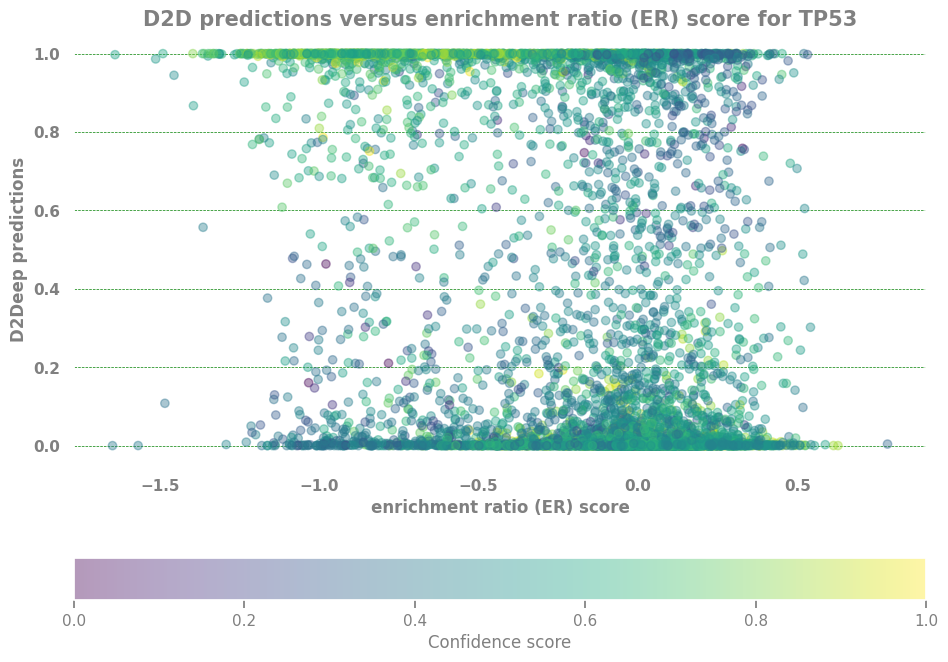

In [ ]:
# plot correlation
correlation, p_value = stats.pearsonr(selected_values['contin_label'], selected_values['D2D_prediction'])

sns.set_theme()
plt.rcParams["figure.figsize"] = (11,8)
plt.figure(facecolor='white')
plt.rcParams['axes.facecolor'] = 'white'

#plt.scatter(selected_values['contin_label'], selected_values['prediction'], alpha=0.6, c = selected_values['contin_label'], cmap="viridis")
plt.scatter(selected_values['contin_label'], selected_values['D2D_prediction'], alpha=0.4, c = selected_values['overall_confidence'], cmap="viridis")
plt.xlabel('enrichment ratio (ER) score', fontweight='bold', color = 'grey' )
plt.ylabel('D2Deep predictions', fontweight='bold', color = 'grey')

#find line of best fit
#a, b = np.polyfit(selected_values['contin_label'], selected_values['D2D_prediction'],1)
#plt.plot(selected_values['contin_label'], a*selected_values['contin_label']+b, color = '#636e6c')

plt.xticks(color = 'grey',fontweight='bold')
plt.yticks(color = 'grey',fontweight='bold')
#plt.text(0.6, 0.1, 'y = ' + '{:.2f}'.format(b) + '+' + ' {:.2f}'.format(a) + 'x', size=20, color='gray',  fontweight='bold')
plt.title("D2D predictions versus enrichment ratio (ER) score for TP53",fontsize = 15, fontweight='bold', color = 'grey')
# plt.colorbar(label="Continuous predictions", orientation="horizontal")

colorbar = plt.colorbar(orientation="horizontal")
# Set the color of the colorbar label
colorbar.set_label('Confidence score', color='grey')
colorbar.ax.tick_params(colors='grey')
plt.grid(color = 'green', linestyle = '--', axis = 'y', linewidth = 0.5)
plt.show()

In [ ]:
print(correlation,p_value)

-0.4048164239752649 9.365567695469062e-292


quantify

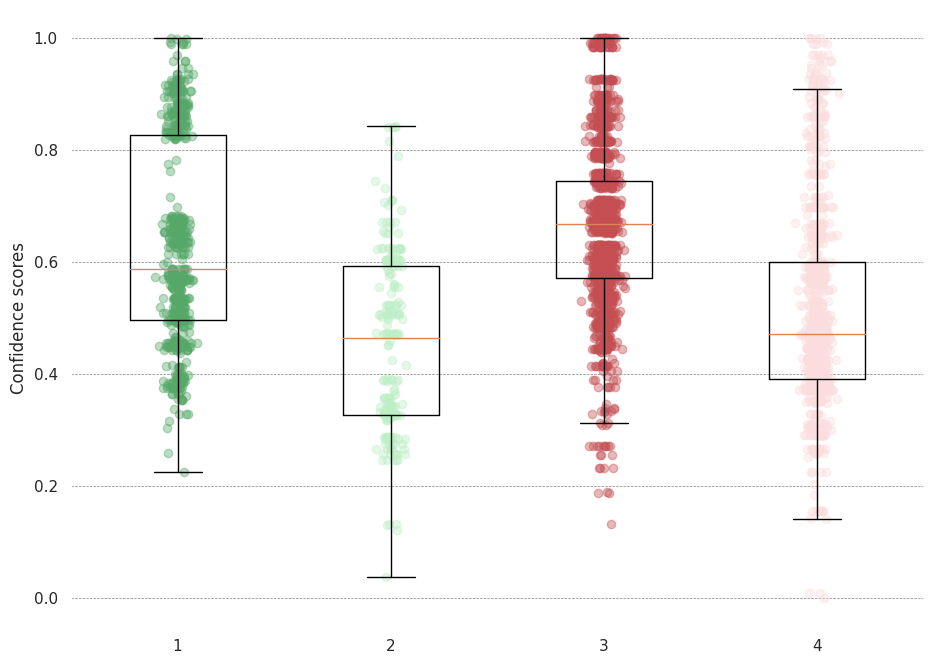

In [ ]:
# Neutral -0.3 < DMS ER < 0.2
# Benign DMS ER > 0.2
# Pathogneic DMS ER -< 0.3
benign_DMS_benign_pred = selected_values[(selected_values['contin_label'] >=0.2) & (selected_values['D2D_prediction'] <0.5 )]
benign_DMS_pathogenic_pred = selected_values[(selected_values['contin_label'] >=0.2) & (selected_values['D2D_prediction'] >=0.5 )]
pathogenic_DMS_pathogenic_pred = selected_values[(selected_values['contin_label']<-0.3) & (selected_values['D2D_prediction'] >= 0.5 )]
pathogenic_DMS_benign_pred = selected_values[(selected_values['contin_label']<-0.3) & (selected_values['D2D_prediction'] < 0.5 )]

benign_DMS_benign_pred=benign_DMS_benign_pred.sample(frac=1).reset_index(drop=True)
benign_DMS_benign_pred = benign_DMS_benign_pred.iloc[:round(len(benign_DMS_benign_pred))]  # Replace with the desired subset from the four lists

benign_DMS_pathogenic_pred= benign_DMS_pathogenic_pred.sample(frac=1).reset_index(drop=True)
benign_DMS_pathogenic_pred = benign_DMS_pathogenic_pred.iloc[:round(len(benign_DMS_pathogenic_pred))]

pathogenic_DMS_pathogenic_pred= pathogenic_DMS_pathogenic_pred.sample(frac=1).reset_index(drop=True)
pathogenic_DMS_pathogenic_pred = pathogenic_DMS_pathogenic_pred.iloc[:round(len(pathogenic_DMS_pathogenic_pred))]

pathogenic_DMS_benign_pred= pathogenic_DMS_benign_pred.sample(frac=1).reset_index(drop=True)
pathogenic_DMS_benign_pred = pathogenic_DMS_benign_pred.iloc[:round(len(pathogenic_DMS_benign_pred))]

subset=[benign_DMS_benign_pred['overall_confidence'].tolist(), benign_DMS_pathogenic_pred['overall_confidence'].tolist(), pathogenic_DMS_pathogenic_pred['overall_confidence'].tolist(),  pathogenic_DMS_benign_pred['overall_confidence'].tolist()]

xs = []
for i, mut in enumerate(subset):
    xs.append(np.random.normal(i+1 , 0.03, len(mut)))  # adds jitter to the data points - can be adjusted

plt.boxplot(subset, showfliers=False)
palette = ['g', '#BDEFC6', 'r', '#FBDDDD']
for x, val, c in zip(xs, subset, palette):
    plt.scatter(x, val, alpha=0.4, color=c)

plt.ylabel('Confidence scores')
#plt.xticks([1,2,3,4], ['Benign predictions for experimentally benign', 'Pathogenic predictions for experimentally benign', 'pathogenic','pathogenic' ])
plt.grid(color = 'gray', linestyle = '--', axis = 'y', linewidth = 0.5)


plt.show()

wilcoxon rank sum test

In [ ]:
import numpy as np
from scipy.stats import ranksums

correct = benign_DMS_benign_pred['overall_confidence'].tolist() + pathogenic_DMS_pathogenic_pred['overall_confidence'].tolist()
incorrect = benign_DMS_pathogenic_pred['overall_confidence'].tolist()+ pathogenic_DMS_benign_pred['overall_confidence'].tolist()

print(ranksums(correct, incorrect))

RanksumsResult(statistic=22.848115817748035, pvalue=1.525803243827383e-115)


### 5 genes

In [ ]:
tp53_confidenceAB =pd.read_csv(path+'TP53_confidenceAB.csv')
braf_confidenceAB =pd.read_csv(path+'BRAF_confidenceAB.csv')
pten_confidenceAB =pd.read_csv(path+'PTEN_confidenceAB.csv')
chek2_confidenceAB =pd.read_csv(path+'CHEK2_confidenceAB.csv')
ar_confidenceAB =pd.read_csv(path+'AR_confidenceAB.csv')
# predictions preprocessing
tp53_predictions, tp53_clinvar= predictions_clinvarlabels_preprocessing('TP53')
tp53_predictions['Log_prob'] = tp53_confidenceAB['Log_prob']
tp53_predictions['prob_benign'] = tp53_confidenceAB['prob_benign']
tp53_predictions['prob_pathogenic'] = tp53_confidenceAB['prob_pathogenic']
tp53_predictions = normalise_confidence(tp53_predictions)

braf_predictions, braf_clinvar= predictions_clinvarlabels_preprocessing('BRAF')
braf_predictions['Log_prob'] = braf_confidenceAB['Log_prob']
braf_predictions['prob_benign'] = braf_confidenceAB['prob_benign']
braf_predictions['prob_pathogenic'] = braf_confidenceAB['prob_pathogenic']
braf_predictions = normalise_confidence(braf_predictions)

pten_predictions, pten_clinvar= predictions_clinvarlabels_preprocessing('PTEN')
pten_predictions['Log_prob'] = pten_confidenceAB['Log_prob']
pten_predictions['prob_benign'] = pten_confidenceAB['prob_benign']
pten_predictions['prob_pathogenic'] = pten_confidenceAB['prob_pathogenic']
pten_predictions = normalise_confidence(pten_predictions)

chek2_predictions, chek2_clinvar= predictions_clinvarlabels_preprocessing('CHEK2')
chek2_predictions['Log_prob'] = chek2_confidenceAB['Log_prob']
chek2_predictions['prob_benign'] = chek2_confidenceAB['prob_benign']
chek2_predictions['prob_pathogenic'] = chek2_confidenceAB['prob_pathogenic']
chek2_predictions = normalise_confidence(chek2_predictions)

ar_predictions, ar_clinvar= predictions_clinvarlabels_preprocessing('AR')
ar_predictions['Log_prob'] = ar_confidenceAB['Log_prob']
ar_predictions['prob_benign'] = ar_confidenceAB['prob_benign']
ar_predictions['prob_pathogenic'] = ar_confidenceAB['prob_pathogenic']
ar_predictions = normalise_confidence(ar_predictions)

# Assign a weight to each prediction based on its confidence level
# call function to calculate overall performance
correct_tp53, incorrect_tp53, vus_nb_tp53, count_mutations_tp53, incorrect_mutation_tp53, correct_mutation_tp53, predictions_clinvar_labels_tp53 = d2d_performance_vs_clinvar_labels_correct(tp53_predictions, tp53_clinvar, False)
correct_braf, incorrect_braf, vus_nb_braf, count_mutations_braf, incorrect_mutation_braf, correct_mutation_braf, predictions_clinvar_labels_braf = d2d_performance_vs_clinvar_labels_correct(braf_predictions,braf_clinvar, False)
correct_pten, incorrect_pten, vus_nb_pten, count_mutations_pten, incorrect_mutation_pten, correct_mutation_pten, predictions_clinvar_labels_pten = d2d_performance_vs_clinvar_labels_correct(pten_predictions,pten_clinvar, False)
correct_chek2, incorrect_chek2, vus_nb_chek2, count_mutations_chek2, incorrect_mutation_chek2, correct_mutation_chek2, predictions_clinvar_labels_chek2 = d2d_performance_vs_clinvar_labels_correct(chek2_predictions,chek2_clinvar, False)
correct_ar, incorrect_ar, vus_nb_ar, count_mutations_ar, incorrect_mutation_ar, correct_mutation_ar, predictions_clinvar_labels_ar = d2d_performance_vs_clinvar_labels_correct(ar_predictions,ar_clinvar, False)

Streaming output truncated to the last 5000 lines.
<ipython-input-7-dd273f8dabf2>:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['correct_label'] = ['VUS']
<ipython-input-7-dd273f8dabf2>:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['condition'] = str(mut['condition'])
<ipython-input-7-dd273f8dabf2>:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [ ]:
#tp53_predictions.to_csv(path+'TP53_d2d_results_confidence.csv')
#braf_predictions.to_csv(path+'BRAF_d2d_results_confidence.csv')
#pten_predictions.to_csv(path+'PTEN_d2d_results_confidence.csv')
#chek2_predictions.to_csv(path+'CHEK2_d2d_results_confidence.csv')
#ar_predictions.to_csv(path+'AR_d2d_results_confidence.csv')

In [ ]:
# concatenate TP53, PTEN, AR, BRAF, CHEK2 predictions in one df
all_predictions_labels = pd.concat([predictions_clinvar_labels_tp53, predictions_clinvar_labels_braf,predictions_clinvar_labels_pten, predictions_clinvar_labels_chek2, predictions_clinvar_labels_ar ], ignore_index=True)

In [ ]:
labelled = all_predictions_labels[all_predictions_labels['correct_label'] != 'VUS']

weighted_sum = (labelled['overall_confidence'] * labelled['correct_label']).sum()
total_weight = labelled['overall_confidence'].sum()
weighted_average = weighted_sum / total_weight
print(weighted_average)

0.9053535952562114


#### TP53

In [ ]:
tp53 = all_predictions_labels[all_predictions_labels['uniprot id'] == 'P04637']
tp53_labelled = labelled[labelled['uniprot id'] == 'P04637']

correct =tp53_labelled['correct_label'].sum()
print(f'Correct labels for TP53: { round(correct)} out of {len(tp53_labelled)} with known significance. Accuracy: {round(correct/ len(tp53_labelled),3)}')
print('--------------------------')
print('Inorrect labels for TP53: ', len(tp53_labelled[tp53_labelled['correct_label'] == 0]))
print('--------------------------')
print(f'VUS labels for TP53: {len(tp53) - len(tp53_labelled)}, VUS percentage in gene annotations {round(len(tp53) - len(tp53_labelled)/len(tp53),3)}')

Correct labels for TP53: 238 out of 280 with known significance. Accuracy: 0.85
--------------------------
Inorrect labels for TP53:  42
--------------------------
VUS labels for TP53: 627, VUS percentage in gene annotations 906.691


In [ ]:
correct, incorrect, vus_nb, count_mutations, incorrect_mutation, correct_mutation, predictions_clinvar_labels = d2d_performance_vs_clinvar_labels_correct(tp53_predictions, tp53_clinvar, False)
predictions_clinvar_labels['pos'] = pd.to_numeric(predictions_clinvar_labels['position'],errors='coerce')
test= predictions_clinvar_labels.sort_values(by='position', ascending=True)

Streaming output truncated to the last 5000 lines.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['condition'] = str(mut['condition'])
<ipython-input-7-dd273f8dabf2>:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_clinvar_labels = predictions_clinvar_labels.append(temp)
<ipython-input-7-dd273f8dabf2>:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['lab_clinvar'] = ['VUS, D2D benign']
<ipython-input-7-dd273f8dabf2>:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [ ]:
fig = px.scatter(test, x='pos', y='D2D_prediction',
                 color =  test['lab_clinvar'],
                 symbol = test['lab_clinvar'],
                 symbol_sequence= ['circle-open', 'circle', 'circle-open','circle','circle', 'circle'],
                 color_discrete_sequence = ['#82AAE3' ,'#82AAE3' ,'#ffa7b1', '#ffa7b1', 'blue'  ,'#ed5564'], opacity = 0.85, width =850, height =400,  hover_data=['conc_mutation', 'D2D_prediction' ])
                 #color_discrete_sequence = ['#a4c639' ,'#a4c639' ,'#ffa7b1', '#ffa7b1', '#23712E'  ,'#D82626'], opacity = 0.85, width =850, height =400,  hover_data=['conc_mutation', 'D2D_prediction' ])


# Change the bar mode

fig.update_layout(barmode='group', title="TP53 Gene ",
    xaxis_title="Position",
    yaxis_title="D2D prediction",
    font_family="Arial",
    legend_title="Groundtruth",
    title_font_family="Arial")

fig.update_layout({
'plot_bgcolor': 'rgba(255, 255, 255, 255)' ,
'paper_bgcolor': 'rgba(255, 255, 255, 255)',
})

fig.show()

weighted performance

In [ ]:
weighted_sum = (tp53_labelled['overall_confidence'] * tp53_labelled['correct_label']).sum()
total_weight = tp53_labelled['overall_confidence'].sum()
weighted_average = weighted_sum / total_weight
print(weighted_average)

0.8995361505725052


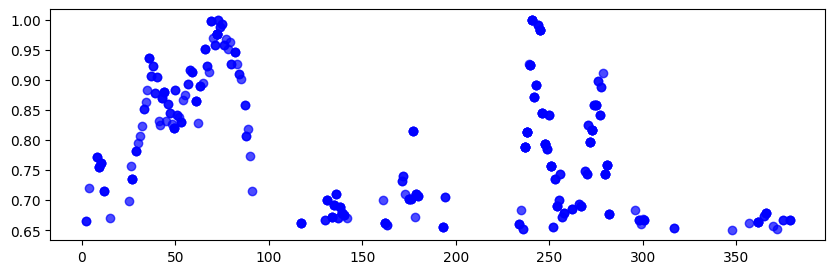

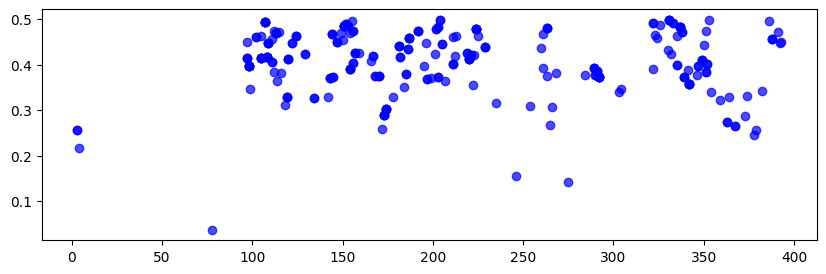

In [ ]:
high_confidence_predictions = tp53[tp53['overall_confidence'] >=0.65]
high_positions =  high_confidence_predictions['position'].tolist()
high_positions = [int(x) for x in high_positions]

low_confidence_predictions = tp53[tp53['overall_confidence'] < 0.5]
low_positions =  low_confidence_predictions['position'].tolist()
low_positions = [int(x) for x in low_positions]

plt.rcParams["figure.figsize"] = (10,3)
plt.scatter(high_positions, high_confidence_predictions['overall_confidence'], label = 'high overall_confidence', c='b', alpha=0.7)
plt.show()
plt.rcParams["figure.figsize"] = (10,3)
plt.scatter(low_positions, low_confidence_predictions['overall_confidence'], label = 'low overall_confidence', c='b', alpha=0.7)
plt.show()

In [ ]:
high_confidence_predictions['pos'] = pd.to_numeric(high_confidence_predictions['position'],errors='coerce')
test_high = high_confidence_predictions.sort_values(by='position', ascending=True)

<ipython-input-35-108ab86bbbda>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.scatter(test_high, x='pos', y='D2D_prediction',
                 color =  test_high['lab_clinvar'],
                 symbol = test_high['lab_clinvar'],
                 symbol_sequence= ['circle', 'circle-open', 'circle-open','circle','circle', 'circle'],
                 #color_discrete_sequence = ['#a4c639' ,'#a4c639' ,'#ffa7b1', '#D82626', '#ffa7b1'  ,'#23712E'], opacity = 0.85, width =850, height =400,  hover_data=['conc_mutation', 'D2D_prediction' ])
                 color_discrete_sequence = ['#82AAE3' ,'#82AAE3' ,'#ffa7b1', '#ed5564', '#ffa7b1','blue' ], opacity = 0.85, width =850, height =400,  hover_data=['conc_mutation', 'D2D_prediction' ])


# Change the bar mode

fig.update_layout(barmode='group', title="TP53 Gene ",
    xaxis_title="Position",
    yaxis_title="D2D prediction",
    font_family="Arial",
    legend_title="Groundtruth",
    title_font_family="Arial")

fig.update_layout({
'plot_bgcolor': 'rgba(255, 255, 255, 255)' ,
'paper_bgcolor': 'rgba(255, 255, 255, 255)',
})

fig.show()

##### Novel mutations

In [ ]:
tp53_predictions_norm = tp53_predictions
#tp53_predictions_norm = normal|ise_confidence(tp53_predictions)

In [ ]:
# p.A138V https://molmed.biomedcentral.com/articles/10.1186/s10020-020-00183-1
tp53_predictions_norm[tp53_predictions_norm['conc_mutation']== 'A138V']

D2D_prediction                                        WT_sequence  \
2605          0.9789  MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...   

                                           mut_sequence uniprot id AA_orig  \
2605  MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...     P04637       A   

     AA_targ  position  Log_prob  prob_benign  prob_pathogenic  \
2605       V       138    49.858     0.000129         0.001306   

      log_normalized  prob_benign_normalized  prob_pathogenic_normalized  \
2605        0.688295                    0.09                        0.91   

      overall_confidence conc_mutation  
2605            0.799147         A138V

[]

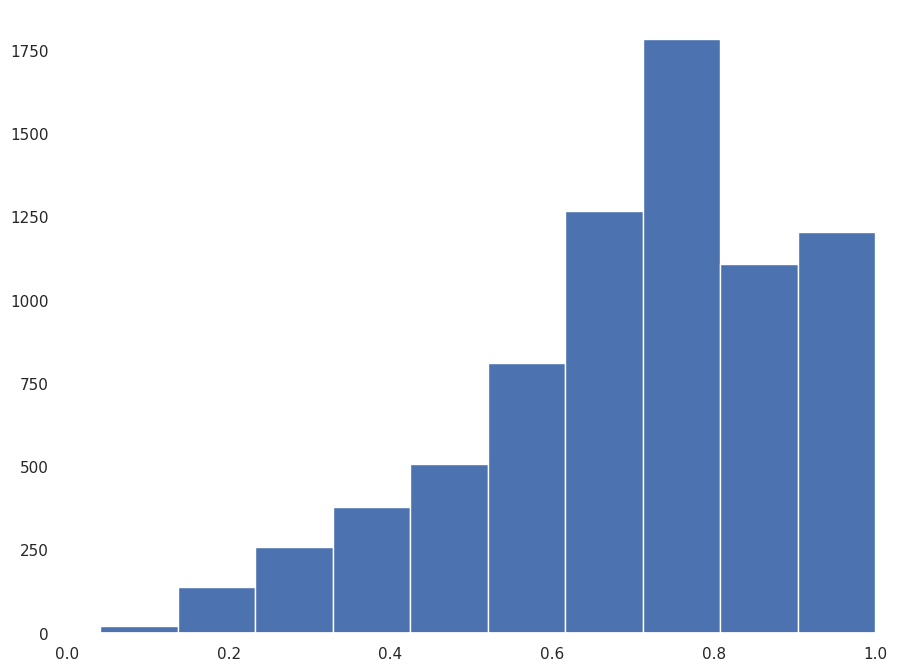

In [ ]:
plt.hist(tp53_predictions_norm['overall_confidence'])
plt.plot()

In [ ]:
# p.Ala276Ile https://pubmed.ncbi.nlm.nih.gov/29783665/
tp53_predictions_norm[tp53_predictions_norm['conc_mutation']=='A276I']

D2D_prediction                                        WT_sequence  \
5241             1.0  MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...   

                                           mut_sequence uniprot id AA_orig  \
5241  MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...     P04637       A   

     AA_targ  position  Log_prob  prob_benign  prob_pathogenic  \
5241       I       276    58.759     0.000058          0.00065   

      log_normalized  prob_benign_normalized  prob_pathogenic_normalized  \
5241        0.898229                   0.083                       0.917   

      overall_confidence conc_mutation  
5241            0.907614         A276I

In [ ]:
tp53_predictions_norm[tp53_predictions_norm['conc_mutation']=='E358V']

D2D_prediction                                        WT_sequence  \
6785          0.0107  MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...   

                                           mut_sequence uniprot id AA_orig  \
6785  MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...     P04637       E   

     AA_targ  position  Log_prob  prob_benign  prob_pathogenic  \
6785       V       358    36.705     0.001475         0.000007   

      log_normalized  prob_benign_normalized  prob_pathogenic_normalized  \
6785        0.378075                   0.995                       0.005   

      overall_confidence conc_mutation  
6785            0.751751         E358V

In [ ]:
# CPV - TP53
print('Prediction:',tp53_predictions_norm[tp53_predictions_norm['conc_mutation']== 'R175H']['D2D_prediction'].values[0], 'Confidence:',  round(tp53_predictions_norm[tp53_predictions_norm['conc_mutation']=='R175H']['overall_confidence'].values[0],3))
print('---------------')
print('Prediction:', tp53_predictions_norm[tp53_predictions_norm['conc_mutation']=='Y220C']['D2D_prediction'].values[0], 'Confidence:',  round(tp53_predictions_norm[tp53_predictions_norm['conc_mutation']== 'Y220C']['overall_confidence'].values[0],3))
print('---------------')
print('Prediction:', tp53_predictions_norm[tp53_predictions_norm['conc_mutation']== 'G245S']['D2D_prediction'].values[0], 'Confidence:',  round(tp53_predictions_norm[tp53_predictions_norm['conc_mutation']=='G245S']['overall_confidence'].values[0],3))
print('---------------')
print('Prediction:', tp53_predictions_norm[tp53_predictions_norm['conc_mutation']=='R248Q']['D2D_prediction'].values[0], 'Confidence:',  round(tp53_predictions_norm[tp53_predictions_norm['conc_mutation']=='R248Q']['overall_confidence'].values[0],3))
print('---------------')
print('Prediction:', tp53_predictions_norm[tp53_predictions_norm['conc_mutation']=='R248W']['D2D_prediction'].values[0], 'Confidence:',  round(tp53_predictions_norm[tp53_predictions_norm['conc_mutation']=='R248W']['overall_confidence'].values[0],3))
print('---------------')
print('Prediction:', tp53_predictions_norm[tp53_predictions_norm['conc_mutation']=='R273C']['D2D_prediction'].values[0], 'Confidence:',  round(tp53_predictions_norm[tp53_predictions_norm['conc_mutation']== 'R273C']['overall_confidence'].values[0],3))
print('---------------')
print('Prediction:', tp53_predictions_norm[tp53_predictions_norm['conc_mutation']=='R273H']['D2D_prediction'].values[0], 'Confidence:',  round(tp53_predictions_norm[tp53_predictions_norm['conc_mutation']== 'R273H']['overall_confidence'].values[0],3))
print('---------------')
print('Prediction:', tp53_predictions_norm[tp53_predictions_norm['conc_mutation']=='R282W']['D2D_prediction'].values[0], 'Confidence:', round( tp53_predictions_norm[tp53_predictions_norm['conc_mutation']== 'R282W']['overall_confidence'].values[0],3))

Prediction: 0.9996 Confidence: 0.803
---------------
Prediction: 0.015 Confidence: 0.237
---------------
Prediction: 1.0 Confidence: 0.991
---------------
Prediction: 0.9998 Confidence: 0.896
---------------
Prediction: 0.9986 Confidence: 0.896
---------------
Prediction: 0.9781 Confidence: 0.876
---------------
Prediction: 1.0 Confidence: 0.859
---------------
Prediction: 0.9995 Confidence: 0.834


##### Feature analysis

######Novel mutations -pre-trained

In [ ]:
def find_positions(lst, n):
    positions = []
    for i, element in enumerate(lst):
        if element > n:
            positions.append(i)
    return positions

In [ ]:
msa_path= '/content/drive/MyDrive/my_colab/3rdYear/datasets/mmseq2/all_msas/'
m = nn.MaxPool1d(50) # Max Pooling for reduction of features from 1024 to 50 per AA

alignment is of length 393 and has 1478 sequences
the new alignment has 184 sequences
the new alignment has 184 sequences
torch.Size([180, 393, 20]) torch.Size([393, 20])
Columns (input to gmm) shape: (180, 20)
[130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141]
[236, 239, 240, 241, 242, 243, 248, 251, 261, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 284]


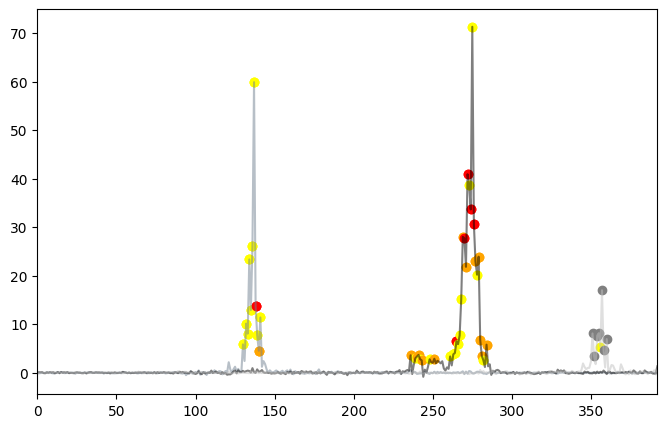

[351, 352, 354, 355, 356, 357, 358, 360]


In [ ]:
uniprot = 'P04637'
plt.rcParams["figure.figsize"] = (8,5)

mut_gene = tp53_predictions[(tp53_predictions['conc_mutation'] == 'A138V') | (tp53_predictions['conc_mutation'] == 'A276I') | (tp53_predictions['conc_mutation'] == 'E358V' )]

## Read in a sequence alignment from a fasta file
if os.path.isfile(msa_path + uniprot+ ".a3m"): # True if file exists
  name_msa_file = msa_path + uniprot+ ".a3m"
else:
  print('MSA not found in folder !')

### MSA of gene
aln_subsection = msa_protocol(name_msa_file)

### Protrans
# calculate the ProTrans for WT protein
lines_list = []
for line in range(len(aln_subsection)):
  temp = aln_subsection.matrix[line, :].tolist()

  x = [x.upper() for x in temp]
  lines_list.append(x)

str1 = " "
lines_string = [str1.join(first_line) for first_line in lines_list]

sequences_WT = [re.sub(r"[-.]", "X", sequence) for sequence in lines_string]

indices_to_excl = []
seq_pooled = []

BATCH_FILE_SIZE = 15
test_features_WT = []
for count in range(0, math.floor(len(sequences_WT) / BATCH_FILE_SIZE)):
    i = sequences_WT[count*15:(count+1)*15][:]
    ids = tokenizer.batch_encode_plus(i, add_special_tokens=True, padding='longest')
    input_ids = torch.tensor(ids['input_ids']).to(device)
    attention_mask = torch.tensor(ids['attention_mask']).to(device)

    with torch.no_grad():
      embedding = model(input_ids=input_ids,attention_mask=attention_mask)
      embedding = embedding.last_hidden_state.cpu().numpy()

      for seq_num in range(len(embedding)):
        seq_len = (attention_mask[seq_num] == 1).sum()
        seq_emd = embedding[seq_num][:seq_len-1]
        test_features_WT.append(seq_emd)
    del attention_mask
    gc.collect()

# converting list to array
arr_WT = np.array(test_features_WT)
seq_temp = torch.tensor(arr_WT)
arr_WT = m(seq_temp) # use when you want to reduce dimensions from 1024 to 20
print(arr_WT.shape, arr_WT[0].shape)
arr_WT =arr_WT.numpy()

columns = range(0, arr_WT.shape[1])
differences_WT = []
densities_WT = []
#density_threshold_WT = []
for col in columns:
    first_col = arr_WT[:, col]
    gmm = GaussianMixture(n_components=1).fit(first_col)
    densities_temp = gmm.score_samples(first_col)
    densities_WT.append(densities_temp)
    threshold_temp = np.percentile(densities_temp, 1)
    #density_threshold_WT.append(threshold_temp)
    #differences_WT.append(abs(densities_temp[0] - threshold_temp) )
    differences_WT.append(densities_temp[0] - threshold_temp)
print('Columns (input to gmm) shape:', first_col.shape )

### Calculate differences of all mutations of gene
points, positions_list, colors = [], [], []
for k, mut in mut_gene.iterrows():
  diction_test = {} # dictionary containing the difference of log-probabilities of mutation from the lof-prob of WT

  mut_seq = mut['mut_sequence']# mutated sequence
  position = int(mut['position'])-1
  AA_orig = mut['AA_orig']
  AA_targ = mut['AA_targ']

  new_str = [str(x) for x in mut_seq]
  new_str[position] = AA_targ

  str1 = " "
  lines_string = str1.join(new_str)
  MUT_sequence = re.sub(r"[-.]", "X", lines_string)

  ids = tokenizer.batch_encode_plus([MUT_sequence], add_special_tokens=True, padding='longest')
  input_ids = torch.tensor(ids['input_ids']).to(device)
  attention_mask = torch.tensor(ids['attention_mask']).to(device)

  with torch.no_grad():
    embedding = model(input_ids=input_ids,attention_mask=attention_mask)
    embedding = embedding.last_hidden_state.cpu().numpy()
    #print(embedding.shape)
    seq_len = (attention_mask == 1).sum()
    seq_emd = embedding[:, :seq_len-1, :]

  seq_emd = torch.tensor(seq_emd)
  seq_emd = m(seq_emd) # use when you want to reduce dimensions from 1024 to 20
  seq_emd =seq_emd.numpy()

  arr_WT[0] = seq_emd[0]
  del embedding, ids, MUT_sequence, attention_mask
  gc.collect()

  columns = range(0, arr_WT.shape[1])
  differences_MUT = []
  densities_MUT = []
  #density_threshold_MUT = []
  for col in columns:
      first_col = arr_WT[:, col]
      gmm = GaussianMixture(n_components=1).fit(first_col)
      densities_temp = gmm.score_samples(first_col)
      densities_MUT.append(densities_temp)
      threshold_temp = np.percentile(densities_temp, 1)
      differences_MUT.append(densities_temp[0] - threshold_temp)

  dif_dif = [differences_WT[i] - differences_MUT[i] for i in range(len(differences_MUT))] # difference of WT and Mutated sequence log probabiities
  points.extend([x for x in dif_dif if x>2.5 ])

  if position == 137:
    positions_list.extend([130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141])
    colors.extend(["yellow","yellow", "yellow", "yellow", "yellow", "yellow",  "yellow", "red", "yellow", "orange" , "yellow"])
    for i in range(len(positions_list)):
        plt.scatter(positions_list[i], points[i], color=colors[i])
    plt.xlim([0, 392])
    plt.plot(dif_dif, c='slategrey', alpha=0.5)

  elif position == 275:

    positions_list.extend([236, 239, 240, 241, 242, 243, 248, 251, 261, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281,282, 284])
    colors.extend(["orange", "yellow", "orange", "orange", "yellow", "orange", "yellow", "orange","yellow", "yellow", "yellow", "red", "yellow", "yellow", "yellow", "orange" , "red","orange", "red", "yellow", "red", "yellow", "red", "orange", "yellow", "orange", "orange", "orange","yellow", "orange"])
    for i in range(len(positions_list)):
        plt.scatter(positions_list[i], points[i], color=colors[i])
    plt.xlim([0, 392])
    plt.plot(dif_dif, c='black', alpha=0.5)

  elif position == 357:
    positions_list.extend([351, 352, 354, 355, 356, 357, 358, 360])
    colors.extend(["grey", "grey", "grey", "grey", "yellow","grey", "grey", "grey"])
    for i in range(len(positions_list)):
        plt.scatter(positions_list[i], points[i], color=colors[i])
    plt.xlim([0, 392])
    plt.plot(dif_dif, c='silver', alpha=0.5)
    plt.show()

  dif_dif_big= [x if x>2.5 else 0 for x in dif_dif ]
  print(find_positions(dif_dif_big,2.5))

  gene_name_mutation = uniprot +'_' + AA_orig + str(mut['position']) + AA_targ
  diction_test['uniprot_mut'] = gene_name_mutation
  diction_test['Log dif'] = dif_dif

alignment is of length 393 and has 1478 sequences
the new alignment has 184 sequences
the new alignment has 184 sequences
torch.Size([180, 393, 20]) torch.Size([393, 20])
Columns (input to gmm) shape: (180, 20)


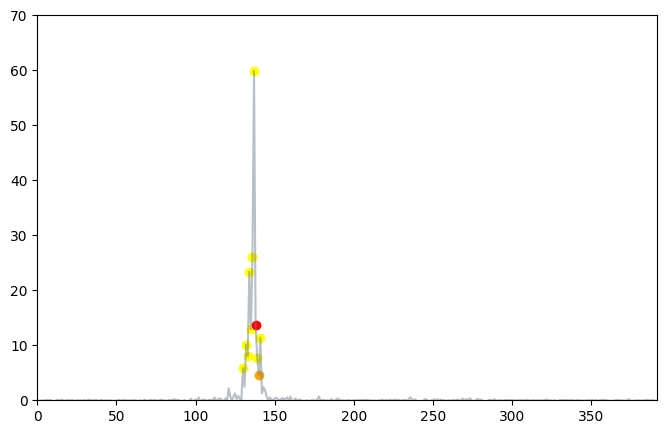

[130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141]


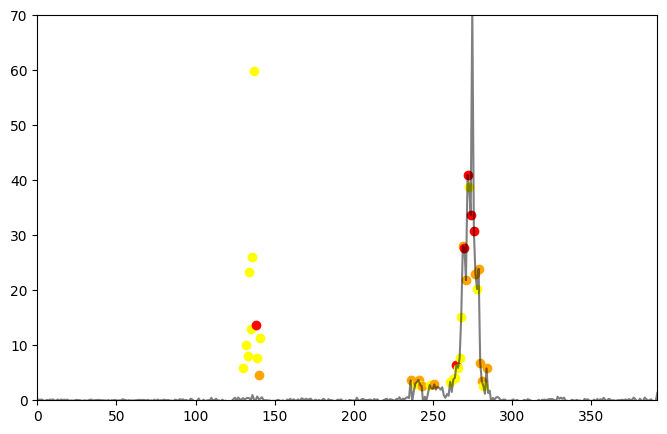

[236, 239, 240, 241, 242, 243, 248, 251, 261, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 284]


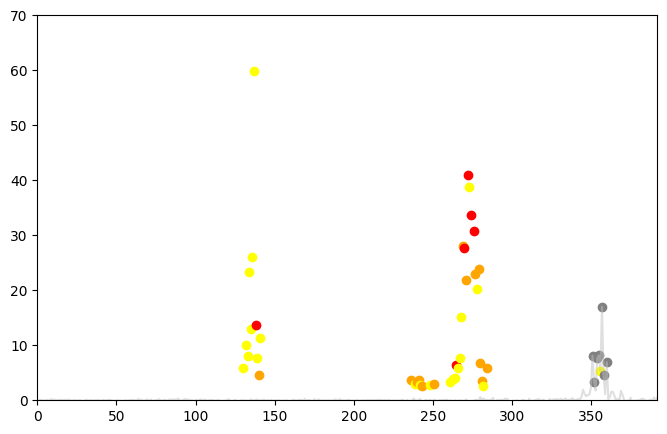

[351, 352, 354, 355, 356, 357, 358, 360]


In [ ]:
uniprot = 'P04637'
plt.rcParams["figure.figsize"] = (8,5)

mut_gene = tp53_predictions[(tp53_predictions['conc_mutation'] == 'A138V') | (tp53_predictions['conc_mutation'] == 'A276I') | (tp53_predictions['conc_mutation'] == 'E358V' )]

## Read in a sequence alignment from a fasta file
if os.path.isfile(msa_path + uniprot+ ".a3m"): # True if file exists
  name_msa_file = msa_path + uniprot+ ".a3m"
else:
  print('MSA not found in folder !')

### MSA of gene
aln_subsection = msa_protocol(name_msa_file)

### Protrans
# calculate the ProTrans for WT protein
lines_list = []
for line in range(len(aln_subsection)):
  temp = aln_subsection.matrix[line, :].tolist()

  x = [x.upper() for x in temp]
  lines_list.append(x)

str1 = " "
lines_string = [str1.join(first_line) for first_line in lines_list]

sequences_WT = [re.sub(r"[-.]", "X", sequence) for sequence in lines_string]

indices_to_excl = []
seq_pooled = []

BATCH_FILE_SIZE = 15
test_features_WT = []
for count in range(0, math.floor(len(sequences_WT) / BATCH_FILE_SIZE)):
    i = sequences_WT[count*15:(count+1)*15][:]
    ids = tokenizer.batch_encode_plus(i, add_special_tokens=True, padding='longest')
    input_ids = torch.tensor(ids['input_ids']).to(device)
    attention_mask = torch.tensor(ids['attention_mask']).to(device)

    with torch.no_grad():
      embedding = model(input_ids=input_ids,attention_mask=attention_mask)
      embedding = embedding.last_hidden_state.cpu().numpy()

      for seq_num in range(len(embedding)):
        seq_len = (attention_mask[seq_num] == 1).sum()
        seq_emd = embedding[seq_num][:seq_len-1]
        test_features_WT.append(seq_emd)
    del attention_mask
    gc.collect()

# converting list to array
arr_WT = np.array(test_features_WT)
seq_temp = torch.tensor(arr_WT)
arr_WT = m(seq_temp) # use when you want to reduce dimensions from 1024 to 20
print(arr_WT.shape, arr_WT[0].shape)
arr_WT =arr_WT.numpy()

columns = range(0, arr_WT.shape[1])
differences_WT = []
densities_WT = []
#density_threshold_WT = []
for col in columns:
    first_col = arr_WT[:, col]
    gmm = GaussianMixture(n_components=1).fit(first_col)
    densities_temp = gmm.score_samples(first_col)
    densities_WT.append(densities_temp)
    threshold_temp = np.percentile(densities_temp, 1)
    #density_threshold_WT.append(threshold_temp)
    #differences_WT.append(abs(densities_temp[0] - threshold_temp) )
    differences_WT.append(densities_temp[0] - threshold_temp)
print('Columns (input to gmm) shape:', first_col.shape )

### Calculate differences of all mutations of gene
points, positions_list, colors = [], [], []
for k, mut in mut_gene.iterrows():
  diction_test = {} # dictionary containing the difference of log-probabilities of mutation from the lof-prob of WT

  mut_seq = mut['mut_sequence']# mutated sequence
  position = int(mut['position'])-1
  AA_orig = mut['AA_orig']
  AA_targ = mut['AA_targ']

  new_str = [str(x) for x in mut_seq]
  new_str[position] = AA_targ

  str1 = " "
  lines_string = str1.join(new_str)
  MUT_sequence = re.sub(r"[-.]", "X", lines_string)

  ids = tokenizer.batch_encode_plus([MUT_sequence], add_special_tokens=True, padding='longest')
  input_ids = torch.tensor(ids['input_ids']).to(device)
  attention_mask = torch.tensor(ids['attention_mask']).to(device)

  with torch.no_grad():
    embedding = model(input_ids=input_ids,attention_mask=attention_mask)
    embedding = embedding.last_hidden_state.cpu().numpy()
    #print(embedding.shape)
    seq_len = (attention_mask == 1).sum()
    seq_emd = embedding[:, :seq_len-1, :]

  seq_emd = torch.tensor(seq_emd)
  seq_emd = m(seq_emd) # use when you want to reduce dimensions from 1024 to 20
  seq_emd =seq_emd.numpy()

  arr_WT[0] = seq_emd[0]
  del embedding, ids, MUT_sequence, attention_mask
  gc.collect()

  columns = range(0, arr_WT.shape[1])
  differences_MUT = []
  densities_MUT = []
  #density_threshold_MUT = []
  for col in columns:
      first_col = arr_WT[:, col]
      gmm = GaussianMixture(n_components=1).fit(first_col)
      densities_temp = gmm.score_samples(first_col)
      densities_MUT.append(densities_temp)
      threshold_temp = np.percentile(densities_temp, 1)
      differences_MUT.append(densities_temp[0] - threshold_temp)

  dif_dif = [differences_WT[i] - differences_MUT[i] for i in range(len(differences_MUT))] # difference of WT and Mutated sequence log probabiities
  points.extend([x for x in dif_dif if x>2.5 ])

  if position == 137:
    positions_list.extend([130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141])
    colors.extend(["yellow","yellow", "yellow", "yellow", "yellow", "yellow",  "yellow", "red", "yellow", "orange" , "yellow"])
    for i in range(len(positions_list)):
        plt.scatter(positions_list[i], points[i], color=colors[i])
    plt.xlim([0, 392])
    plt.ylim([0, 70])
    plt.plot(dif_dif, c='slategrey', alpha=0.5)
    plt.show()

  elif position == 275:

    positions_list.extend([236, 239, 240, 241, 242, 243, 248, 251, 261, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281,282, 284])
    colors.extend(["orange", "yellow", "orange", "orange", "yellow", "orange", "yellow", "orange","yellow", "yellow", "yellow", "red", "yellow", "yellow", "yellow", "orange" , "red","orange", "red", "yellow", "red", "yellow", "red", "orange", "yellow", "orange", "orange", "orange","yellow", "orange"])
    for i in range(len(positions_list)):
        plt.scatter(positions_list[i], points[i], color=colors[i])
    plt.xlim([0, 392])
    plt.ylim([0, 70])
    plt.plot(dif_dif, c='black', alpha=0.5)
    plt.show()

  elif position == 357:
    positions_list.extend([351, 352, 354, 355, 356, 357, 358, 360])
    colors.extend(["grey", "grey", "grey", "grey", "yellow","grey", "grey", "grey"])
    for i in range(len(positions_list)):
        plt.scatter(positions_list[i], points[i], color=colors[i])
    plt.xlim([0, 392])
    plt.ylim([0, 70])
    plt.plot(dif_dif, c='silver', alpha=0.5)
    plt.show()

  dif_dif_big= [x if x>2.5 else 0 for x in dif_dif ]
  print(find_positions(dif_dif_big,2.5))

  gene_name_mutation = uniprot +'_' + AA_orig + str(mut['position']) + AA_targ
  diction_test['uniprot_mut'] = gene_name_mutation
  diction_test['Log dif'] = dif_dif

######Novel mutations - GMM

In [ ]:
# import GMM representations
# import difference for each mutation
test = pd.read_csv('/content/drive/MyDrive/log_probWT_MUT_P04637_2200AA_57_maxpool.csv', header = None, names = ['mutation', 'log_difference', 'label'])

fl_dif = []
for x in test['log_difference']:
  p = x[1:-1].split(',')
  fl_dif.append([float(i) for i in p])

test['fl_dif'] = fl_dif

# pad to 2200 AA
N= 2200
fl_dif_pad, positions, proteins_temp =[], [], []
for i, mut in test.iterrows():
  mut_temp = mut.mutation.split('_')[1]
  proteins_temp.append(mut.mutation.split('_')[0])
  positions.append(mut_temp[1: -1])
  a = mut['fl_dif']
  new_a = a + [0] * (N - len(a))
  fl_dif_pad.append(new_a)
test['fl_dif_pad'] = fl_dif_pad

stacked_flat_drgn =[]
for i, mut in test.iterrows():
  stacked_flat_drgn.append(torch.tensor(mut['fl_dif_pad']))

stacked_drgn = torch.stack(stacked_flat_drgn)
print(stacked_drgn.shape)

torch.Size([7467, 2200])


In [ ]:
A138V_GMM = test[test['mutation'] == 'P04637_A138V']['fl_dif']

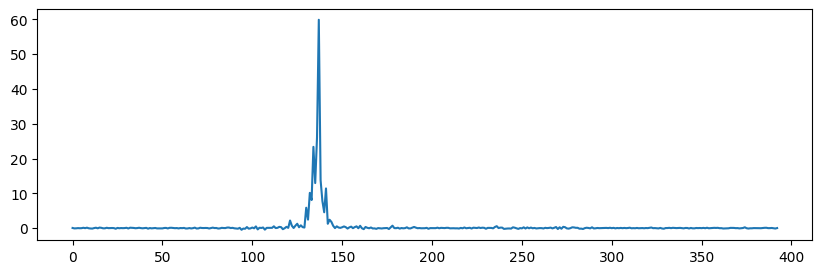

In [ ]:
plt.plot(A173V_GMM.tolist()[0])
plt.show()

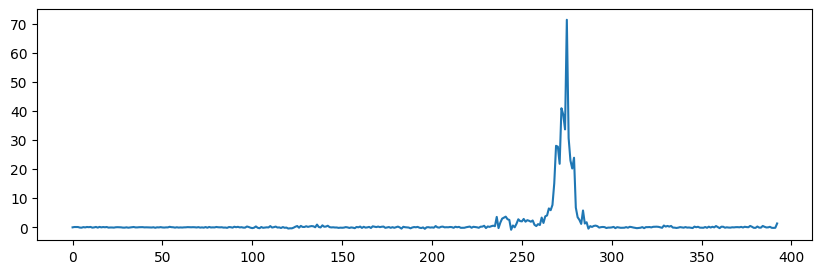

In [ ]:
A276E_GMM = test[test['mutation'] == 'P04637_A276I']['fl_dif']
plt.plot(A276E_GMM.tolist()[0])
plt.show()

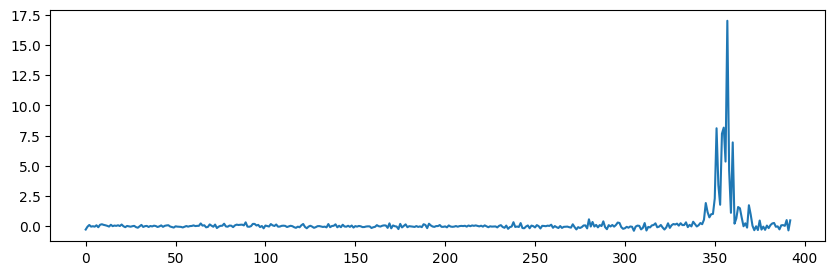

In [ ]:
E358V_GMM = test[test['mutation'] == 'P04637_E358V']['fl_dif']
plt.plot(E358V_GMM.tolist()[0])
plt.show()

######Very confident pathogenic mutations - GMM

In [ ]:
import heapq

conf_05 = tp53[tp53['overall_confidence'] <=0.5]
conf_51 = tp53[tp53['overall_confidence'] >0.5 ]

conf_05_VUS = conf_05[conf_05['lab_clinvar'].str.contains('VUS')]
conf_51_VUS = conf_51[conf_51['lab_clinvar'].str.contains('VUS')]

conf_05_VUS_repres, conf_05_VUS_repres_peaks = [], []
for i, mut in conf_05_VUS.iterrows():
  mutation = mut['uniprot id'] + '_' + mut['AA_orig']+ mut['position']+ mut['AA_targ']
  conf_05_VUS_repres.extend(test[test['mutation'] == mutation]['fl_dif'].tolist()[0])
  # find the 10 peaks of representation
  conf_05_VUS_repres_peaks.extend(heapq.nlargest(10, conf_05_VUS_repres))

conf_51_VUS_repres,conf_51_VUS_repres_peaks = [], []
for i, mut in conf_51_VUS.iterrows():
  mutation = mut['uniprot id'] + '_' + mut['AA_orig']+ mut['position']+ mut['AA_targ']
  conf_51_VUS_repres.extend(test[test['mutation'] == mutation]['fl_dif'].tolist()[0])
  # find the 10 peaks of representation
  conf_51_VUS_repres_peaks.extend(heapq.nlargest(10, conf_51_VUS_repres))

filtered_conf_05_VUS_repres = [k for k in conf_05_VUS_repres if k> 10]
filtered_conf_51_VUS_repres = [k for k in conf_51_VUS_repres if k> 10]

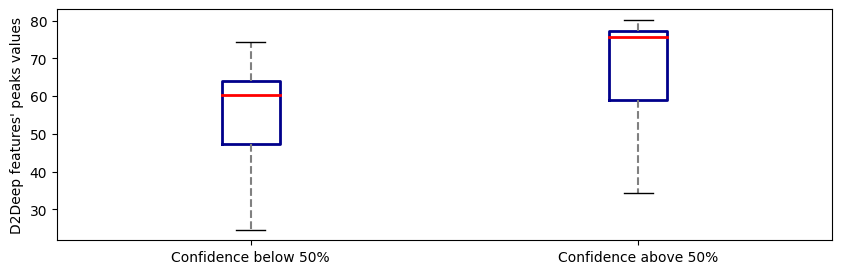

In [ ]:
# Step 1: Create a figure and axes object
fig, ax = plt.subplots()
data = [conf_05_VUS_repres_peaks, conf_51_VUS_repres_peaks]
boxplot = ax.boxplot(data, labels=['Confidence below 50%', 'Confidence above 50%'], showfliers=False)

# Step 3: Customize the appearance of the boxplot
boxprops = dict(linestyle='-', linewidth=2, color='darkblue')
medianprops = dict(linestyle='-', linewidth=2, color='red')
whiskerprops = dict(linestyle='--', linewidth=1.5, color='gray')

for box in boxplot['boxes']:
    box.set(**boxprops)

for median in boxplot['medians']:
    median.set(**medianprops)

for whisker in boxplot['whiskers']:
    whisker.set(**whiskerprops)

# Step 4: Optionally, add labels, title, and legends to enhance the plot
ax.set_ylabel('D2Deep features\' peaks values')
#ax.set_title('Boxplot of Two Lists A and B')
#ax.legend([boxplot["boxes"][0], boxplot["boxes"][1]], ['A', 'B'])

# Step 5: Show the plot
plt.show()

Novel mutations predicted pathogenic vs confirmed pathogenic ones

In [ ]:
confirmed_benign = tp53_labelled[tp53_labelled['lab_clinvar'].str.contains('benign')]
confirmed_pathogenic = tp53_labelled[tp53_labelled['lab_clinvar'].str.contains('pathogenic')]

In [ ]:
print(len(confirmed_benign), len(confirmed_pathogenic))

104 176


In [ ]:
confirmed_benign_repres, confirmed_benign_repres_peaks = [], []
for i, mut in confirmed_benign.iterrows():
  mutation = mut['uniprot id'] + '_' + mut['AA_orig']+ mut['position']+ mut['AA_targ']
  confirmed_benign_repres.extend(test[test['mutation'] == mutation]['fl_dif'].tolist()[0])
  # find the 10 peaks of representation
  confirmed_benign_repres_peaks.extend(heapq.nlargest(10, confirmed_benign_repres))

confirmed_pathogenic_repres, confirmed_pathogenic_repres_peaks = [], []
for i, mut in confirmed_pathogenic.iterrows():
  mutation = mut['uniprot id'] + '_' + mut['AA_orig']+ mut['position']+ mut['AA_targ']
  confirmed_pathogenic_repres.extend(test[test['mutation'] == mutation]['fl_dif'].tolist()[0])
  # find the 10 peaks of representation
  confirmed_pathogenic_repres_peaks.extend(heapq.nlargest(10, confirmed_pathogenic_repres))

In [ ]:
tp53_unlabelled = tp53[tp53['lab_clinvar'].str.contains('VUS')]
VUS_benign = tp53_unlabelled[tp53_unlabelled['lab_clinvar'].str.contains('benign')]
VUS_pathogenic = tp53_unlabelled[tp53_unlabelled['lab_clinvar'].str.contains('deleterious')]

In [ ]:
print(len(VUS_benign), len(VUS_pathogenic) )

352 275


In [ ]:
VUS_benign_repres, VUS_benign_repres_peaks = [], []
for i, mut in VUS_benign.iterrows():
  mutation = mut['uniprot id'] + '_' + mut['AA_orig']+ mut['position']+ mut['AA_targ']
  VUS_benign_repres.extend(test[test['mutation'] == mutation]['fl_dif'].tolist()[0])
  # find the 10 peaks of representation
  VUS_benign_repres_peaks.extend(heapq.nlargest(10, VUS_benign_repres))

VUS_pathogenic_repres, VUS_pathogenic_repres_peaks = [], []
for i, mut in VUS_pathogenic.iterrows():
  mutation = mut['uniprot id'] + '_' + mut['AA_orig']+ mut['position']+ mut['AA_targ']
  VUS_pathogenic_repres.extend(test[test['mutation'] == mutation]['fl_dif'].tolist()[0])
  # find the 10 peaks of representation
  VUS_pathogenic_repres_peaks.extend(heapq.nlargest(10, VUS_pathogenic_repres))

In [ ]:
VUS_benign_confident = VUS_benign[VUS_benign['overall_confidence'] >=0.5]
VUS_pathogenic_confident = VUS_pathogenic[VUS_pathogenic['overall_confidence'] >=0.5]

VUS_benign_confident_repres, VUS_benign_confident_repres_peaks = [], []
for i, mut in VUS_benign_confident.iterrows():
  mutation = mut['uniprot id'] + '_' + mut['AA_orig']+ mut['position']+ mut['AA_targ']
  VUS_benign_confident_repres.extend(test[test['mutation'] == mutation]['fl_dif'].tolist()[0])
  # find the 10 peaks of representation
  VUS_benign_confident_repres_peaks.extend(heapq.nlargest(10, VUS_benign_confident_repres))

VUS_pathogenic_confident_repres, VUS_pathogenic_confident_repres_peaks = [], []
for i, mut in VUS_pathogenic_confident.iterrows():
  mutation = mut['uniprot id'] + '_' + mut['AA_orig']+ mut['position']+ mut['AA_targ']
  VUS_pathogenic_confident_repres.extend(test[test['mutation'] == mutation]['fl_dif'].tolist()[0])
  # find the 10 peaks of representation
  VUS_pathogenic_confident_repres_peaks.extend(heapq.nlargest(10, VUS_pathogenic_confident_repres))

In [ ]:
print(len(VUS_benign_confident), len(VUS_pathogenic_confident) )

211 206


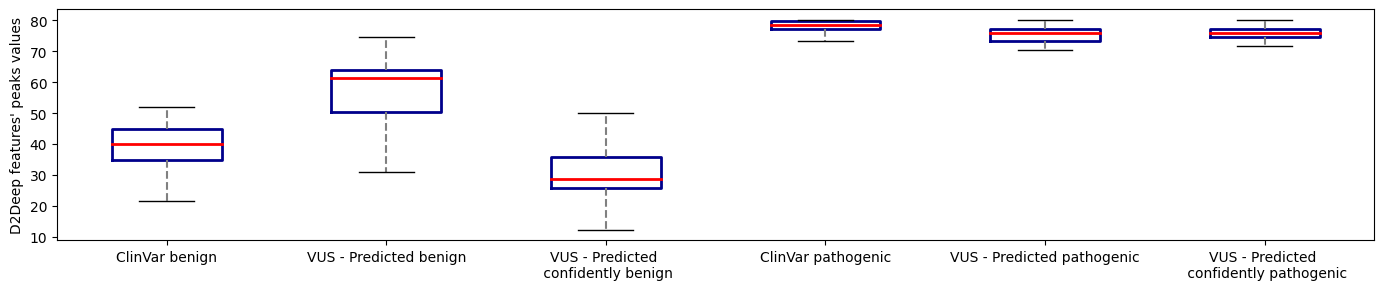

In [ ]:
plt.rcParams["figure.figsize"] = (17,3)

fig, ax = plt.subplots()
data = [confirmed_benign_repres_peaks,VUS_benign_repres_peaks, VUS_benign_confident_repres_peaks , confirmed_pathogenic_repres_peaks, VUS_pathogenic_repres_peaks, VUS_pathogenic_confident_repres_peaks, ]
boxplot = ax.boxplot(data, labels=['ClinVar benign', 'VUS - Predicted benign', 'VUS - Predicted \n confidently benign', 'ClinVar pathogenic', 'VUS - Predicted pathogenic', 'VUS - Predicted \n confidently pathogenic'], showfliers=False)

# Step 3: Customize the appearance of the boxplot
boxprops = dict(linestyle='-', linewidth=2, color='darkblue')
medianprops = dict(linestyle='-', linewidth=2, color='red')
whiskerprops = dict(linestyle='--', linewidth=1.5, color='gray')

for box in boxplot['boxes']:
    box.set(**boxprops)

for median in boxplot['medians']:
    median.set(**medianprops)

for whisker in boxplot['whiskers']:
    whisker.set(**whiskerprops)

# Step 4: Optionally, add labels, title, and legends to enhance the plot
ax.set_ylabel('D2Deep features\' peaks values')
#ax.set_title('Boxplot of Two Lists A and B')
#ax.legend([boxplot["boxes"][0], boxplot["boxes"][1]], ['A', 'B'])

# Step 5: Show the plot
plt.show()

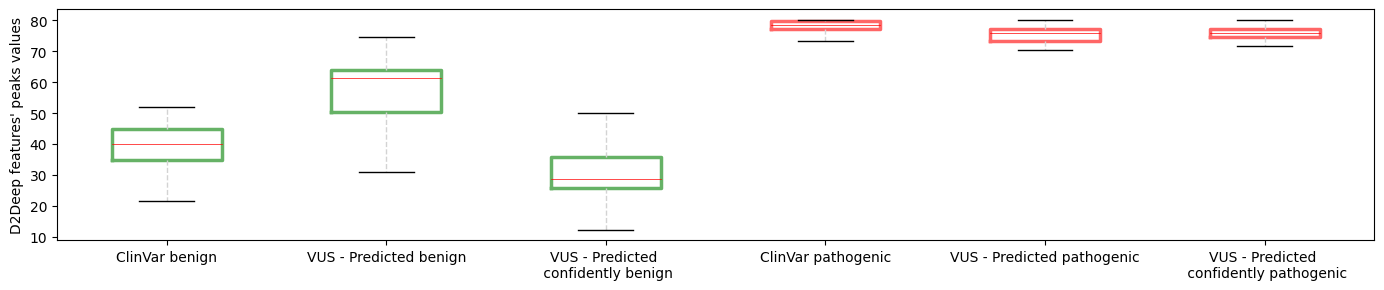

In [ ]:
fig, ax = plt.subplots()

data = [
    confirmed_benign_repres_peaks,
    VUS_benign_repres_peaks,
    VUS_benign_confident_repres_peaks,
    confirmed_pathogenic_repres_peaks,
    VUS_pathogenic_repres_peaks,
    VUS_pathogenic_confident_repres_peaks,
]

# Set the colors for the first 3 and last 3 boxplots
colors = ['green', 'green', 'green', 'red', 'red', 'red']

boxplot = ax.boxplot(data, labels=['ClinVar benign', 'VUS - Predicted benign', 'VUS - Predicted \n confidently benign', 'ClinVar pathogenic', 'VUS - Predicted pathogenic', 'VUS - Predicted \n confidently pathogenic'], showfliers=False)

# Step 3: Customize the appearance of the boxplot
boxprops = dict(linestyle='-', linewidth=2.5,  alpha=0.6)
medianprops = dict(linestyle='-', linewidth=0.5, color='red')
whiskerprops = dict(linestyle='--', linewidth=1, color='lightgray')

# Set the edge color for each box based on the colors list
for i, box in enumerate(boxplot['boxes']):
    boxprops["color"] = colors[i]
    box.update(boxprops)

for median in boxplot['medians']:
    median.set(**medianprops)

for whisker in boxplot['whiskers']:
    whisker.set(**whiskerprops)

# Step 4: Optionally, add labels, title, and legends to enhance the plot
ax.set_ylabel("D2Deep features' peaks values")

# Step 5: Show the plot
plt.show()

######Very confident pathogenic mutations - pre-trained

In [ ]:
tp53_predictions, tp53_clinvar= predictions_clinvarlabels_preprocessing('TP53')
tp53_predictions['Log_prob'] = tp53_confidenceAB['Log_prob']
tp53_predictions['prob_benign'] = tp53_confidenceAB['prob_benign']
tp53_predictions['prob_pathogenic'] = tp53_confidenceAB['prob_pathogenic']
tp53_predictions = normalise_confidence(tp53_predictions)

In [ ]:
mut_gene = tp53_predictions[(tp53_predictions['overall_confidence'] == 1) & (tp53_predictions['D2D_prediction'] == 1) & (tp53_predictions['AA_targ'] != 'Y') & (tp53_predictions['AA_targ'] != 'C') & (tp53_predictions['AA_targ'] != 'F') & (tp53_predictions['AA_targ'] != 'A')] # S241Y, S241C, S241F, S241A : pathogenic in clinvar

In [ ]:
uniprot = 'P04637'
plt.rcParams["figure.figsize"] = (8,5)

## Read in a sequence alignment from a fasta file
if os.path.isfile(msa_path + uniprot+ ".a3m"): # True if file exists
  name_msa_file = msa_path + uniprot+ ".a3m"
else:
  print('MSA not found in folder !')

### MSA of gene
aln_subsection = msa_protocol(name_msa_file)

### Protrans
# calculate the ProTrans for WT protein
lines_list = []
for line in range(len(aln_subsection)):
  temp = aln_subsection.matrix[line, :].tolist()

  x = [x.upper() for x in temp]
  lines_list.append(x)

str1 = " "
lines_string = [str1.join(first_line) for first_line in lines_list]

sequences_WT = [re.sub(r"[-.]", "X", sequence) for sequence in lines_string]

indices_to_excl = []
seq_pooled = []

BATCH_FILE_SIZE = 15
test_features_WT = []
for count in range(0, math.floor(len(sequences_WT) / BATCH_FILE_SIZE)):
    i = sequences_WT[count*15:(count+1)*15][:]
    ids = tokenizer.batch_encode_plus(i, add_special_tokens=True, padding='longest')
    input_ids = torch.tensor(ids['input_ids']).to(device)
    attention_mask = torch.tensor(ids['attention_mask']).to(device)

    with torch.no_grad():
      embedding = model(input_ids=input_ids,attention_mask=attention_mask)
      embedding = embedding.last_hidden_state.cpu().numpy()

      for seq_num in range(len(embedding)):
        seq_len = (attention_mask[seq_num] == 1).sum()
        seq_emd = embedding[seq_num][:seq_len-1]
        test_features_WT.append(seq_emd)
    del attention_mask
    gc.collect()

# converting list to array
arr_WT = np.array(test_features_WT)
seq_temp = torch.tensor(arr_WT)
arr_WT = m(seq_temp) # use when you want to reduce dimensions from 1024 to 20
print(arr_WT.shape, arr_WT[0].shape)
arr_WT =arr_WT.numpy()

columns = range(0, arr_WT.shape[1])
differences_WT = []
densities_WT = []
#density_threshold_WT = []
for col in columns:
    first_col = arr_WT[:, col]
    gmm = GaussianMixture(n_components=1).fit(first_col)
    densities_temp = gmm.score_samples(first_col)
    densities_WT.append(densities_temp)
    threshold_temp = np.percentile(densities_temp, 1)
    #density_threshold_WT.append(threshold_temp)
    #differences_WT.append(abs(densities_temp[0] - threshold_temp) )
    differences_WT.append(densities_temp[0] - threshold_temp)
print('Columns (input to gmm) shape:', first_col.shape )

### Calculate differences of all mutations of gene

points, positions_list, colors = [], [], []
for k, mut in mut_gene.iterrows():
  diction_test = {} # dictionary containing the difference of log-probabilities of mutation from the lof-prob of WT

  mut_seq = mut['mut_sequence']# mutated sequence
  position = int(mut['position'])-1
  AA_orig = mut['AA_orig']
  AA_targ = mut['AA_targ']

  new_str = [str(x) for x in mut_seq]
  new_str[position] = AA_targ

  str1 = " "
  lines_string = str1.join(new_str)
  MUT_sequence = re.sub(r"[-.]", "X", lines_string)

  ids = tokenizer.batch_encode_plus([MUT_sequence], add_special_tokens=True, padding='longest')
  input_ids = torch.tensor(ids['input_ids']).to(device)
  attention_mask = torch.tensor(ids['attention_mask']).to(device)

  with torch.no_grad():
    embedding = model(input_ids=input_ids,attention_mask=attention_mask)
    embedding = embedding.last_hidden_state.cpu().numpy()
    #print(embedding.shape)
    seq_len = (attention_mask == 1).sum()
    seq_emd = embedding[:, :seq_len-1, :]

  seq_emd = torch.tensor(seq_emd)
  seq_emd = m(seq_emd) # use when you want to reduce dimensions from 1024 to 20
  seq_emd =seq_emd.numpy()

  arr_WT[0] = seq_emd[0]
  del embedding, ids, MUT_sequence, attention_mask
  gc.collect()

  columns = range(0, arr_WT.shape[1])
  differences_MUT = []
  densities_MUT = []

  for col in columns:
      first_col = arr_WT[:, col]
      gmm = GaussianMixture(n_components=1).fit(first_col)
      densities_temp = gmm.score_samples(first_col)
      densities_MUT.append(densities_temp)
      threshold_temp = np.percentile(densities_temp, 1)
      differences_MUT.append(densities_temp[0] - threshold_temp)

  dif_dif = [differences_WT[i] - differences_MUT[i] for i in range(len(differences_MUT))] # difference of WT and Mutated sequence log probabiities
  plt.plot(dif_dif)
  plt.show()

  dif_dif_big= [x if x>2 else 0 for x in dif_dif ]
  plt.scatter(list(range(0,len(dif_dif))), dif_dif_big)
  plt.show()
  print(find_positions(dif_dif_big,2))

  ### Save dif_dif in a dictionary with keys: genename_mutation
  gene_name_mutation = uniprot +'_' + AA_orig + str(mut['position']) + AA_targ

  diction_test['uniprot_mut'] = gene_name_mutation
  #print(gene_name_mutation, mut['label'])
  diction_test['Log dif'] = dif_dif
  #diction_test['label'] = mut['label']

NameError: ignored

In [ ]:
uniprot = 'P04637'
plt.rcParams["figure.figsize"] = (8,5)

## Read in a sequence alignment from a fasta file
if os.path.isfile(msa_path + uniprot+ ".a3m"): # True if file exists
  name_msa_file = msa_path + uniprot+ ".a3m"
else:
  print('MSA not found in folder !')

### MSA of gene
aln_subsection = msa_protocol(name_msa_file)

### Protrans
# calculate the ProTrans for WT protein
lines_list = []
for line in range(len(aln_subsection)):
  temp = aln_subsection.matrix[line, :].tolist()

  x = [x.upper() for x in temp]
  lines_list.append(x)

str1 = " "
lines_string = [str1.join(first_line) for first_line in lines_list]

sequences_WT = [re.sub(r"[-.]", "X", sequence) for sequence in lines_string]

indices_to_excl = []
seq_pooled = []

BATCH_FILE_SIZE = 15
test_features_WT = []
for count in range(0, math.floor(len(sequences_WT) / BATCH_FILE_SIZE)):
    i = sequences_WT[count*15:(count+1)*15][:]
    ids = tokenizer.batch_encode_plus(i, add_special_tokens=True, padding='longest')
    input_ids = torch.tensor(ids['input_ids']).to(device)
    attention_mask = torch.tensor(ids['attention_mask']).to(device)

    with torch.no_grad():
      embedding = model(input_ids=input_ids,attention_mask=attention_mask)
      embedding = embedding.last_hidden_state.cpu().numpy()

      for seq_num in range(len(embedding)):
        seq_len = (attention_mask[seq_num] == 1).sum()
        seq_emd = embedding[seq_num][:seq_len-1]
        test_features_WT.append(seq_emd)
    del attention_mask
    gc.collect()

# converting list to array
arr_WT = np.array(test_features_WT)
seq_temp = torch.tensor(arr_WT)
arr_WT = m(seq_temp) # use when you want to reduce dimensions from 1024 to 20
print(arr_WT.shape, arr_WT[0].shape)
arr_WT =arr_WT.numpy()

columns = range(0, arr_WT.shape[1])
differences_WT = []
densities_WT = []
#density_threshold_WT = []
for col in columns:
    first_col = arr_WT[:, col]
    gmm = GaussianMixture(n_components=1).fit(first_col)
    densities_temp = gmm.score_samples(first_col)
    densities_WT.append(densities_temp)
    threshold_temp = np.percentile(densities_temp, 1)
    differences_WT.append(densities_temp[0] - threshold_temp)
print('Columns (input to gmm) shape:', first_col.shape )

### Calculate differences of all mutations of gene

points, positions_list, colors = [], [], []
for k, mut in mut_gene.iterrows():
  diction_test = {} # dictionary containing the difference of log-probabilities of mutation from the lof-prob of WT

  mut_seq = mut['mut_sequence']# mutated sequence
  position = int(mut['position'])-1
  AA_orig = mut['AA_orig']
  AA_targ = mut['AA_targ']

  new_str = [str(x) for x in mut_seq]
  new_str[position] = AA_targ

  str1 = " "
  lines_string = str1.join(new_str)
  MUT_sequence = re.sub(r"[-.]", "X", lines_string)

  ids = tokenizer.batch_encode_plus([MUT_sequence], add_special_tokens=True, padding='longest')
  input_ids = torch.tensor(ids['input_ids']).to(device)
  attention_mask = torch.tensor(ids['attention_mask']).to(device)

  with torch.no_grad():
    embedding = model(input_ids=input_ids,attention_mask=attention_mask)
    embedding = embedding.last_hidden_state.cpu().numpy()
    #print(embedding.shape)
    seq_len = (attention_mask == 1).sum()
    seq_emd = embedding[:, :seq_len-1, :]

  seq_emd = torch.tensor(seq_emd)
  seq_emd = m(seq_emd) # use when you want to reduce dimensions from 1024 to 20
  seq_emd =seq_emd.numpy()

  arr_WT[0] = seq_emd[0]
  del embedding, ids, MUT_sequence, attention_mask
  gc.collect()

  columns = range(0, arr_WT.shape[1])
  differences_MUT = []
  densities_MUT = []
  for col in columns:
      first_col = arr_WT[:, col]
      gmm = GaussianMixture(n_components=1).fit(first_col)
      densities_temp = gmm.score_samples(first_col)
      densities_MUT.append(densities_temp)
      threshold_temp = np.percentile(densities_temp, 1)
      differences_MUT.append(densities_temp[0] - threshold_temp)

  dif_dif = [differences_WT[i] - differences_MUT[i] for i in range(len(differences_MUT))] # difference of WT and Mutated sequence log probabiities

  points.extend([x for x in dif_dif if x>7 ])

  if position == 137:
    positions_list.extend([133, 134, 135, 136, 138, 139, 140, 142])
    colors.extend(["yellow", "yellow", "yellow",  "yellow", "yellow", "red", "yellow" , "yellow"])

    for i in range(len(positions_list)):
        plt.scatter(positions_list[i], points[i], color=colors[i])
    plt.xlim([0, 392])
    plt.plot(dif_dif, c='slategrey', alpha=0.5)


  elif position == 275:

    positions_list.extend([268, 269, 270, 271, 272, 273, 274, 276, 277, 278, 279, 280])
    colors.extend(["yellow", "yellow", "orange", "red", "orange", "red", "yellow" , "red", "red" , "orange", "yellow" , "orange" ])

    for i in range(len(positions_list)):
        plt.scatter(positions_list[i], points[i], color=colors[i])
    plt.xlim([0, 392])
    plt.plot(dif_dif, c='black', alpha=0.5)


  elif position == 357:

    positions_list.extend([352, 355, 356])
    colors.extend(["grey", "grey", "grey"])

    for i in range(len(positions_list)):
        plt.scatter(positions_list[i], points[i], color=colors[i])
    plt.xlim([0, 392])
    plt.plot(dif_dif, c='silver', alpha=0.5)

  plt.show()

  ### Save dif_dif in a dictionary with keys: genename_mutation
  gene_name_mutation = uniprot +'_' + AA_orig + str(mut['position']) + AA_targ

  diction_test['uniprot_mut'] = gene_name_mutation
  diction_test['Log dif'] = dif_dif

NameError: ignored

alignment is of length 393 and has 1478 sequences
the new alignment has 184 sequences
the new alignment has 184 sequences
torch.Size([180, 393, 20]) torch.Size([393, 20])
Columns (input to gmm) shape: (180, 20)


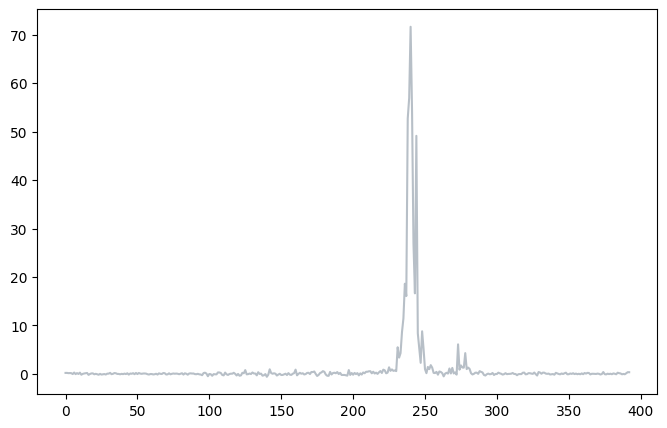

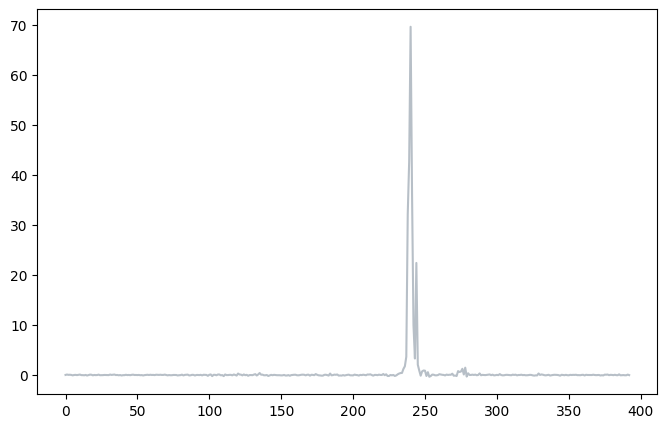

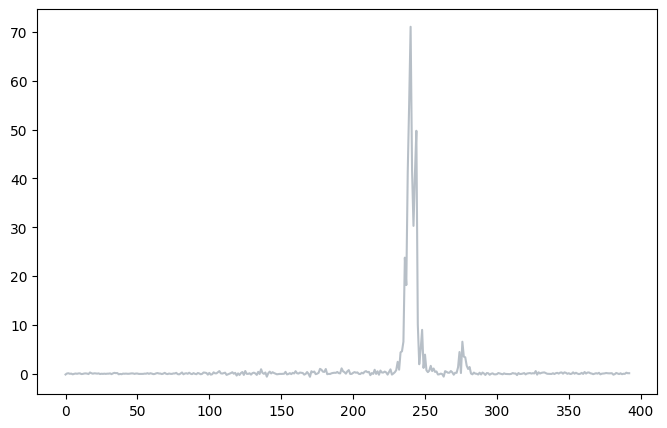

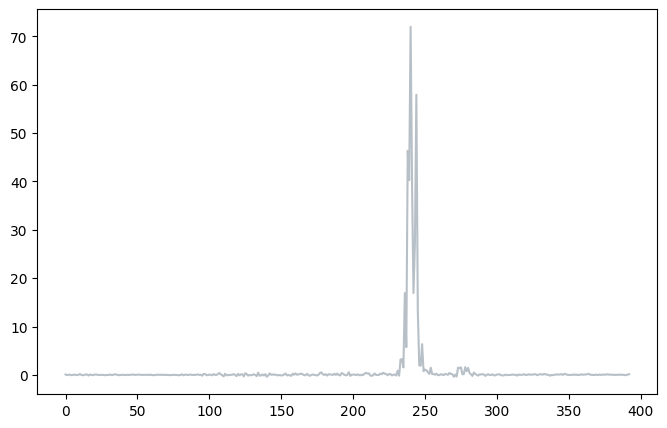

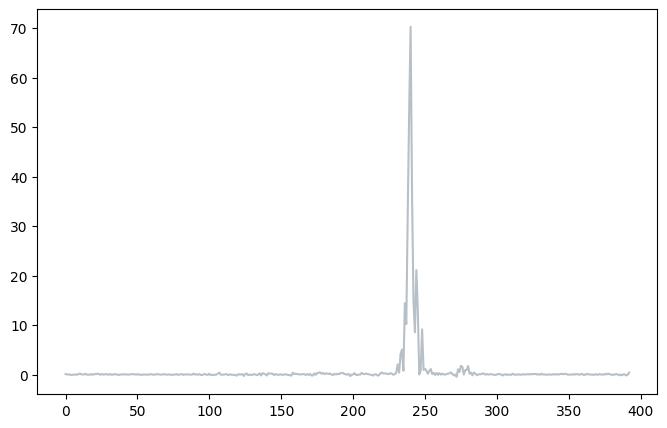

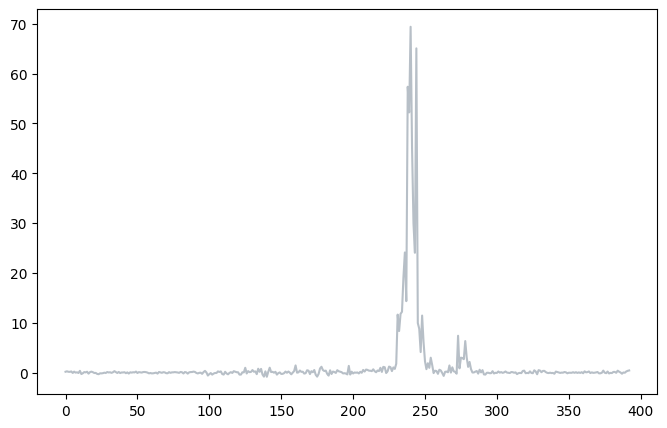

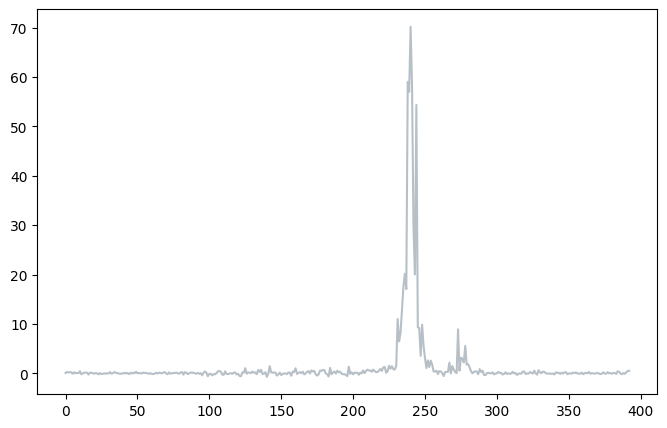

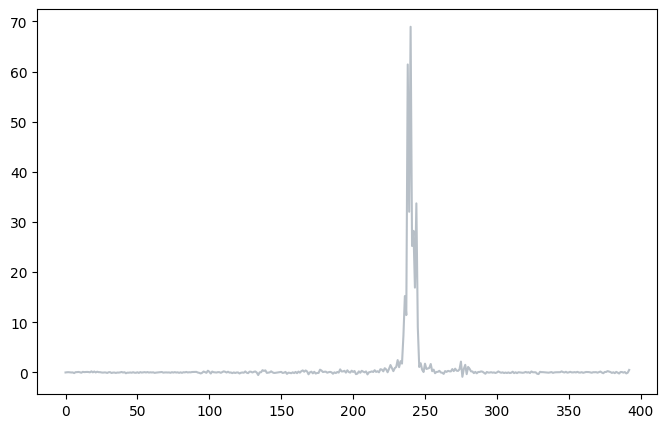

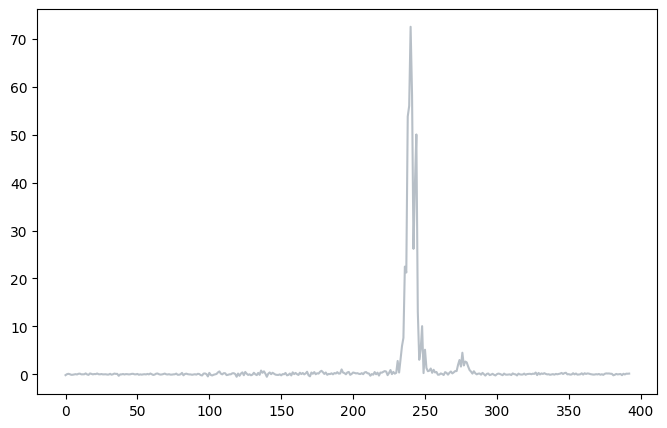

In [ ]:
uniprot = 'P04637'
plt.rcParams["figure.figsize"] = (8,5)

## Read in a sequence alignment from a fasta file
if os.path.isfile(msa_path + uniprot+ ".a3m"): # True if file exists
  name_msa_file = msa_path + uniprot+ ".a3m"
else:
  print('MSA not found in folder !')

### MSA of gene
aln_subsection = msa_protocol(name_msa_file)

### Protrans
# calculate the ProTrans for WT protein
lines_list = []
for line in range(len(aln_subsection)):
  temp = aln_subsection.matrix[line, :].tolist()

  x = [x.upper() for x in temp]
  lines_list.append(x)

str1 = " "
lines_string = [str1.join(first_line) for first_line in lines_list]

sequences_WT = [re.sub(r"[-.]", "X", sequence) for sequence in lines_string]

indices_to_excl = []
seq_pooled = []

BATCH_FILE_SIZE = 15
test_features_WT = []
for count in range(0, math.floor(len(sequences_WT) / BATCH_FILE_SIZE)):
    i = sequences_WT[count*15:(count+1)*15][:]
    ids = tokenizer.batch_encode_plus(i, add_special_tokens=True, padding='longest')
    input_ids = torch.tensor(ids['input_ids']).to(device)
    attention_mask = torch.tensor(ids['attention_mask']).to(device)

    with torch.no_grad():
      embedding = model(input_ids=input_ids,attention_mask=attention_mask)
      embedding = embedding.last_hidden_state.cpu().numpy()

      for seq_num in range(len(embedding)):
        seq_len = (attention_mask[seq_num] == 1).sum()
        seq_emd = embedding[seq_num][:seq_len-1]
        test_features_WT.append(seq_emd)
    del attention_mask
    gc.collect()

# converting list to array
arr_WT = np.array(test_features_WT)
seq_temp = torch.tensor(arr_WT)
arr_WT = m(seq_temp) # use when you want to reduce dimensions from 1024 to 20
print(arr_WT.shape, arr_WT[0].shape)
arr_WT =arr_WT.numpy()

columns = range(0, arr_WT.shape[1])
differences_WT = []
densities_WT = []
#density_threshold_WT = []
for col in columns:
    first_col = arr_WT[:, col]
    gmm = GaussianMixture(n_components=1).fit(first_col)
    densities_temp = gmm.score_samples(first_col)
    densities_WT.append(densities_temp)
    threshold_temp = np.percentile(densities_temp, 1)
    differences_WT.append(densities_temp[0] - threshold_temp)
print('Columns (input to gmm) shape:', first_col.shape )

### Calculate differences of all mutations of gene

points, positions_list, colors = [], [], []
for k, mut in mut_gene.iterrows():
  diction_test = {} # dictionary containing the difference of log-probabilities of mutation from the lof-prob of WT

  mut_seq = mut['mut_sequence']# mutated sequence
  position = int(mut['position'])-1
  AA_orig = mut['AA_orig']
  AA_targ = mut['AA_targ']

  new_str = [str(x) for x in mut_seq]
  new_str[position] = AA_targ

  str1 = " "
  lines_string = str1.join(new_str)
  MUT_sequence = re.sub(r"[-.]", "X", lines_string)

  ids = tokenizer.batch_encode_plus([MUT_sequence], add_special_tokens=True, padding='longest')
  input_ids = torch.tensor(ids['input_ids']).to(device)
  attention_mask = torch.tensor(ids['attention_mask']).to(device)

  with torch.no_grad():
    embedding = model(input_ids=input_ids,attention_mask=attention_mask)
    embedding = embedding.last_hidden_state.cpu().numpy()
    #print(embedding.shape)
    seq_len = (attention_mask == 1).sum()
    seq_emd = embedding[:, :seq_len-1, :]

  seq_emd = torch.tensor(seq_emd)
  seq_emd = m(seq_emd) # use when you want to reduce dimensions from 1024 to 20
  seq_emd =seq_emd.numpy()

  arr_WT[0] = seq_emd[0]
  del embedding, ids, MUT_sequence, attention_mask
  gc.collect()

  columns = range(0, arr_WT.shape[1])
  differences_MUT = []
  densities_MUT = []
  for col in columns:
      first_col = arr_WT[:, col]
      gmm = GaussianMixture(n_components=1).fit(first_col)
      densities_temp = gmm.score_samples(first_col)
      densities_MUT.append(densities_temp)
      threshold_temp = np.percentile(densities_temp, 1)
      differences_MUT.append(densities_temp[0] - threshold_temp)

  dif_dif = [differences_WT[i] - differences_MUT[i] for i in range(len(differences_MUT))] # difference of WT and Mutated sequence log probabiities

  points.extend([x for x in dif_dif if x>7 ])

  #if position == 137:
    #positions_list.extend([133, 134, 135, 136, 138, 139, 140, 142])
    #colors.extend(["yellow", "yellow", "yellow",  "yellow", "yellow", "red", "yellow" , "yellow"])

    #for i in range(len(positions_list)):
    #    plt.scatter(positions_list[i], points[i], color=colors[i])
    #plt.xlim([0, 392])
  plt.plot(dif_dif, c='slategrey', alpha=0.5)
  '''

  elif position == 275:

    positions_list.extend([268, 269, 270, 271, 272, 273, 274, 276, 277, 278, 279, 280])
    colors.extend(["yellow", "yellow", "orange", "red", "orange", "red", "yellow" , "red", "red" , "orange", "yellow" , "orange" ])

    for i in range(len(positions_list)):
        plt.scatter(positions_list[i], points[i], color=colors[i])
    plt.xlim([0, 392])
    plt.plot(dif_dif, c='black', alpha=0.5)


  elif position == 357:

    positions_list.extend([352, 355, 356])
    colors.extend(["grey", "grey", "grey"])

    for i in range(len(positions_list)):
        plt.scatter(positions_list[i], points[i], color=colors[i])
    plt.xlim([0, 392])
    plt.plot(dif_dif, c='silver', alpha=0.5)
   '''

  plt.show()

  ### Save dif_dif in a dictionary with keys: genename_mutation
  gene_name_mutation = uniprot +'_' + AA_orig + str(mut['position']) + AA_targ

  diction_test['uniprot_mut'] = gene_name_mutation
  diction_test['Log dif'] = dif_dif

#### BRAF

In [ ]:
braf = all_predictions_labels[all_predictions_labels['uniprot id'] == 'P15056']
braf_labelled = labelled[labelled['uniprot id'] == 'P15056']

correct =braf_labelled['correct_label'].sum()
print(f'Correct labels for braf: { round(correct)} out of {len(braf_labelled)} with known significance. Accuracy: {round(correct/ len(braf_labelled),3)}')
print('--------------------------')
print('Inorrect labels for braf: ', len(braf_labelled[braf_labelled['correct_label'] == 0]))
print('--------------------------')
print(f'VUS labels for braf: {len(braf) - len(braf_labelled)}, VUS percentage in gene annotations {round(len(braf) - len(braf_labelled)/len(braf),3)}')

Correct labels for braf: 97 out of 109 with known significance. Accuracy: 0.89
--------------------------
Inorrect labels for braf:  12
--------------------------
VUS labels for braf: 243, VUS percentage in gene annotations 351.69


In [ ]:
correct, incorrect, vus_nb, count_mutations, incorrect_mutation, correct_mutation, predictions_clinvar_labels = d2d_performance_vs_clinvar_labels_correct(braf_predictions, braf_clinvar, False)
predictions_clinvar_labels['pos'] = pd.to_numeric(predictions_clinvar_labels['position'],errors='coerce')
test= predictions_clinvar_labels.sort_values(by='position', ascending=True)

Streaming output truncated to the last 5000 lines.
<ipython-input-6-e8836e35655a>:103: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-6-e8836e35655a>:104: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-6-e8836e35655a>:105: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [ ]:
fig = px.scatter(test, x='pos', y='D2D_prediction',
                 color =  test['lab_clinvar'],
                 symbol = test['lab_clinvar'],
                 symbol_sequence= ['circle-open', 'circle-open', 'circle','circle','circle', 'circle'],
                 #color_discrete_sequence = ['#a4c639' ,'#ffa7b1' ,'#a4c639', '#ffa7b1', '#23712E'  ,'#D82626'], opacity = 0.85, width =850, height =400,  hover_data=['conc_mutation', 'D2D_prediction' ])
                 color_discrete_sequence = ['#82AAE3' ,'#ffa7b1' ,'#82AAE3', '#ffa7b1', 'blue','#ed5564' ], opacity = 0.85, width =850, height =400,  hover_data=['conc_mutation', 'D2D_prediction' ])


# Change the bar mode
fig.update_layout(barmode='group', title="BRAF Gene ",
    xaxis_title="Position",
    yaxis_title="D2D prediction",
    font_family="Arial",
    legend_title="Groundtruth",
    title_font_family="Arial")

fig.update_layout({
'plot_bgcolor': 'rgba(255, 255, 255, 255)' ,
'paper_bgcolor': 'rgba(255, 255, 255, 255)',
})

fig.show()

Weigthed Accuracy

In [ ]:
weighted_sum = (braf_labelled['overall_confidence'] * braf_labelled['correct_label']).sum()
total_weight = braf_labelled['overall_confidence'].sum()
weighted_average = weighted_sum / total_weight
print(weighted_average)

0.9350891749384007


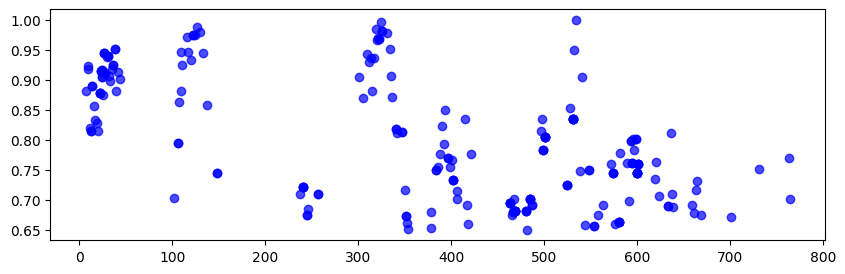

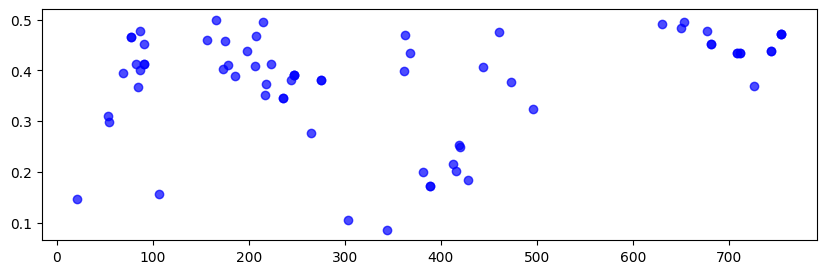

In [ ]:
high_confidence_predictions = braf[braf['overall_confidence'] >=0.65] # 0.5
high_positions =  high_confidence_predictions['position'].tolist()
high_positions = [int(x) for x in high_positions]

low_confidence_predictions = braf[braf['overall_confidence'] < 0.5] #0.3
low_positions =  low_confidence_predictions['position'].tolist()
low_positions = [int(x) for x in low_positions]

plt.rcParams["figure.figsize"] = (10,3)
plt.scatter(high_positions, high_confidence_predictions['overall_confidence'], label = 'high overall_confidence', c='b', alpha=0.7)
plt.show()
plt.rcParams["figure.figsize"] = (10,3)
plt.scatter(low_positions, low_confidence_predictions['overall_confidence'], label = 'low overall_confidence', c='b', alpha=0.7)
plt.show()

In [ ]:
high_confidence_predictions['pos'] = pd.to_numeric(high_confidence_predictions['position'],errors='coerce')
test_high = high_confidence_predictions.sort_values(by='position', ascending=True)

<ipython-input-37-108ab86bbbda>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.scatter(test_high, x='pos', y='D2D_prediction',
                 color =  test_high['lab_clinvar'],
                 symbol = test_high['lab_clinvar'],
                 symbol_sequence= ['circle-open', 'circle', 'circle','circle-open','circle', 'circle'],
                 #color_discrete_sequence = ['#a4c639' ,'#a4c639' ,'#ffa7b1', '#23712E', '#D82626'  ,'#ffa7b1'], opacity = 0.85, width =850, height =400,  hover_data=['conc_mutation', 'D2D_prediction' ])
                 color_discrete_sequence = ['#82AAE3' ,'#82AAE3' ,'blue', '#ffa7b1', '#ffa7b1','#ed5564' ], opacity = 0.85, width =850, height =400,  hover_data=['conc_mutation', 'D2D_prediction' ])


# Change the bar mode
fig.update_layout(barmode='group', title="BRAF Gene ",
    xaxis_title="Position",
    yaxis_title="D2D prediction",
    font_family="Arial",
    legend_title="Groundtruth",
    title_font_family="Arial")

fig.update_layout({
'plot_bgcolor': 'rgba(255, 255, 255, 255)' ,
'paper_bgcolor': 'rgba(255, 255, 255, 255)',
})

fig.show()

Novel mutations

In [ ]:
braf_predictions_norm = normalise_confidence(braf_predictions)

In [ ]:
# CPV - BRAF
print('Prediction:',braf_predictions_norm[braf_predictions_norm['conc_mutation']== 'G469A']['D2D_prediction'].values[0], 'Confidence:',  round(braf_predictions_norm[braf_predictions_norm['conc_mutation']== 'G469A']['overall_confidence'].values[0],3))
print('---------------')
print('Prediction:',braf_predictions_norm[braf_predictions_norm['conc_mutation']== 'G469R']['D2D_prediction'].values[0], 'Confidence:',  round(braf_predictions_norm[braf_predictions_norm['conc_mutation']== 'G469R']['overall_confidence'].values[0],3))
print('---------------')
print('Prediction:', braf_predictions_norm[braf_predictions_norm['conc_mutation']== 'G469E']['D2D_prediction'].values[0], 'Confidence:',  round(braf_predictions_norm[braf_predictions_norm['conc_mutation']== 'G469E']['overall_confidence'].values[0],3))
print('---------------')
print('Prediction:', braf_predictions_norm[braf_predictions_norm['conc_mutation']==  'G469V']['D2D_prediction'].values[0], 'Confidence:',  round(braf_predictions_norm[braf_predictions_norm['conc_mutation']== 'G469V']['overall_confidence'].values[0],3))
print('---------------')
print('Prediction:', braf_predictions_norm[braf_predictions_norm['conc_mutation']==  'D594G']['D2D_prediction'].values[0], 'Confidence:',  round(braf_predictions_norm[braf_predictions_norm['conc_mutation']==  'D594G']['overall_confidence'].values[0],3))
print('---------------')
print('Prediction:',braf_predictions_norm[braf_predictions_norm['conc_mutation']==  'V600E']['D2D_prediction'].values[0], 'Confidence:',  round(braf_predictions_norm[braf_predictions_norm['conc_mutation']==  'V600E']['overall_confidence'].values[0],3))
print('---------------')
print('Prediction:', braf_predictions_norm[braf_predictions_norm['conc_mutation']== 'V600K']['D2D_prediction'].values[0], 'Confidence:',  round(braf_predictions_norm[braf_predictions_norm['conc_mutation']==  'V600K']['overall_confidence'].values[0],3))
print('---------------')
print('Prediction:', braf_predictions_norm[braf_predictions_norm['conc_mutation']==  'V600M']['D2D_prediction'].values[0], 'Confidence:', round(braf_predictions_norm[braf_predictions_norm['conc_mutation']==  'V600M']['overall_confidence'].values[0],3))
print('---------------')
print('Prediction:', braf_predictions_norm[braf_predictions_norm['conc_mutation']== 'V600R']['D2D_prediction'].values[0], 'Confidence:', round( braf_predictions_norm[braf_predictions_norm['conc_mutation']== 'V600R']['overall_confidence'].values[0],3))
print('---------------')
print('Prediction:', braf_predictions_norm[braf_predictions_norm['conc_mutation']== 'K601E']['D2D_prediction'].values[0], 'Confidence:', round( braf_predictions_norm[braf_predictions_norm['conc_mutation']==  'K601E']['overall_confidence'].values[0],3))

In [ ]:
# Novel F468S and N581Y https://www.sciencedirect.com/science/article/pii/S1556086420304664
braf_predictions_norm[braf_predictions_norm['conc_mutation']== 'F468S']

In [ ]:
braf_predictions_norm[braf_predictions_norm['conc_mutation'] == 'N581Y']

#### PTEN

In [ ]:
pten = all_predictions_labels[all_predictions_labels['uniprot id'] == 'P60484']
pten_labelled = labelled[labelled['uniprot id'] == 'P60484']

correct =pten_labelled['correct_label'].sum()
print(f'Correct labels \for pten: { round(correct)} out of {len(pten_labelled)} with known significance. Accuracy: {round(correct/ len(pten_labelled),3)}')
print('--------------------------')
print('Inorrect labels for pten: ', len(pten_labelled[pten_labelled['correct_label'] == 0]))
print('--------------------------')
print(f'VUS labels for pten: {len(pten) - len(pten_labelled)}, VUS percentage in gene annotations {round((len(pten) - len(pten_labelled))/len(pten),3)}')

Correct labels or pten: 143 out of 175 with known significance. Accuracy: 0.817
--------------------------
Inorrect labels for pten:  32
--------------------------
VUS labels for pten: 586, VUS percentage in gene annotations 0.77


In [ ]:
correct, incorrect, vus_nb, count_mutations, incorrect_mutation, correct_mutation, predictions_clinvar_labels = d2d_performance_vs_clinvar_labels_correct(pten_predictions, pten_clinvar, False)
predictions_clinvar_labels['pos'] = pd.to_numeric(predictions_clinvar_labels['position'],errors='coerce')
test= predictions_clinvar_labels.sort_values(by='position', ascending=True)

Streaming output truncated to the last 5000 lines.
<ipython-input-7-dd273f8dabf2>:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['condition'] = str(mut['condition'])
<ipython-input-7-dd273f8dabf2>:114: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_clinvar_labels = predictions_clinvar_labels.append(temp)
<ipython-input-7-dd273f8dabf2>:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['lab_clinv

In [ ]:
fig = px.scatter(test, x='pos', y='D2D_prediction',
                 color =  test['lab_clinvar'],
                 symbol = test['lab_clinvar'],
                 symbol_sequence= ['circle', 'circle-open','circle','circle-open', 'circle'],
                 color_discrete_sequence = ['#ed5564' , '#ffa7b1', '#ffa7b1','#82AAE3', '#82AAE3' ], opacity = 0.85, width =850, height =400,  hover_data=['conc_mutation', 'D2D_prediction' ])
                 #color_discrete_sequence = ['#a4c639' ,'#a4c639' ,'#ffa7b1', '#ffa7b1', '#23712E'  ,'#D82626'], opacity = 0.85, width =850, height =400,  hover_data=['conc_mutation', 'D2D_prediction' ])



# Change the bar mode
fig.update_layout(barmode='group', title="PTEN Gene ",
    xaxis_title="Position",
    yaxis_title="D2D prediction",
    font_family="Arial",
    legend_title="Groundtruth",
    title_font_family="Arial")

fig.update_layout({
'plot_bgcolor': 'rgba(255, 255, 255, 255)' ,
'paper_bgcolor': 'rgba(255, 255, 255, 255)',
})

fig.show()

In [ ]:
fig = px.scatter(test, x='pos', y='D2D_prediction',
                 color =  test['lab_clinvar'],
                 symbol = test['lab_clinvar'],
                 symbol_sequence= ['circle', 'circle-open', 'circle','circle-open','circle'],
                 color_discrete_sequence = ['#D82626' ,'#ffa7b1' ,'#ffa7b1', '#a4c639', '#a4c639' ], opacity = 0.85, width =850, height =400,  hover_data=['conc_mutation', 'D2D_prediction' ])


# Change the bar mode
fig.update_layout(barmode='group', title="PTEN Gene ",
    xaxis_title="Position",
    yaxis_title="D2D prediction",
    font_family="Arial",
    legend_title="Groundtruth",
    title_font_family="Arial")

fig.update_layout({
'plot_bgcolor': 'rgba(255, 255, 255, 255)' ,
'paper_bgcolor': 'rgba(255, 255, 255, 255)',
})

fig.show()

Weigthed Accuracy

In [ ]:
weighted_sum = (pten_labelled['overall_confidence'] * pten_labelled['correct_label']).sum()
total_weight = pten_labelled['overall_confidence'].sum()
weighted_average = weighted_sum / total_weight
print(weighted_average)

0.8933458979697918


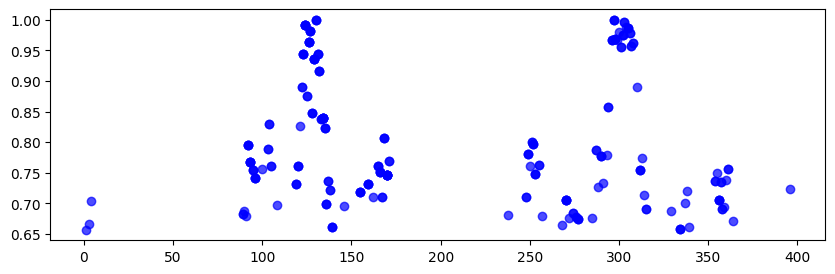

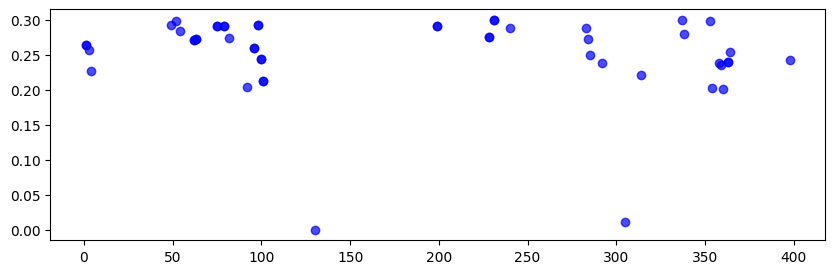

In [ ]:
high_confidence_predictions = pten[pten['overall_confidence'] >=0.65]
high_positions =  high_confidence_predictions['position'].tolist()
high_positions = [int(x) for x in high_positions]

low_confidence_predictions = pten[pten['overall_confidence'] < 0.3]
low_positions =  low_confidence_predictions['position'].tolist()
low_positions = [int(x) for x in low_positions]

plt.rcParams["figure.figsize"] = (10,3)
plt.scatter(high_positions, high_confidence_predictions['overall_confidence'], label = 'high overall_confidence', c='b', alpha=0.7)
plt.show()
plt.rcParams["figure.figsize"] = (10,3)
plt.scatter(low_positions, low_confidence_predictions['overall_confidence'], label = 'low overall_confidence', c='b', alpha=0.7)
plt.show()

In [ ]:
high_confidence_predictions['pos'] = pd.to_numeric(high_confidence_predictions['position'],errors='coerce')
test_high = high_confidence_predictions.sort_values(by='position', ascending=True)

<ipython-input-20-108ab86bbbda>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.scatter(test_high, x='pos', y='D2D_prediction',
                 color =  test_high['lab_clinvar'],
                 symbol = test_high['lab_clinvar'],
                symbol_sequence= ['circle', 'circle-open','circle','circle-open', 'circle'],
                 color_discrete_sequence = ['#ed5564' , '#ffa7b1', '#ffa7b1','#82AAE3', '#82AAE3' ], opacity = 0.85, width =850, height =400,  hover_data=['conc_mutation', 'D2D_prediction' ])


# Change the bar mode
fig.update_layout(barmode='group', title="PTEN Gene ",
    xaxis_title="Position",
    yaxis_title="D2D prediction",
    font_family="Arial",
    legend_title="Groundtruth",
    title_font_family="Arial")

fig.update_layout({
'plot_bgcolor': 'rgba(255, 255, 255, 255)' ,
'paper_bgcolor': 'rgba(255, 255, 255, 255)',
})

fig.show()

#### CHEK2

In [ ]:
pten = all_predictions_labels[all_predictions_labels['uniprot id'] == 'O96017']
pten_labelled = labelled[labelled['uniprot id'] == 'O96017']

correct =pten_labelled['correct_label'].sum()
print(f'Correct labels for CHEK2: { round(correct)} out of {len(pten_labelled)} with known significance. Accuracy: {round(correct/ len(pten_labelled),3)}')
print('--------------------------')
print('Inorrect labels for CHEK2: ', len(pten_labelled[pten_labelled['correct_label'] == 0]))
print('--------------------------')
print(f'VUS labels for CHEK2: {len(pten) - len(pten_labelled)}, VUS percentage in gene annotations {round((len(pten) - len(pten_labelled))/len(pten),3)}')

Correct labels for CHEK2: 9 out of 10 with known significance. Accuracy: 0.9
--------------------------
Inorrect labels for CHEK2:  1
--------------------------
VUS labels for CHEK2: 1498, VUS percentage in gene annotations 0.993


In [ ]:
correct, incorrect, vus_nb, count_mutations, incorrect_mutation, correct_mutation, predictions_clinvar_labels = d2d_performance_vs_clinvar_labels_correct(chek2_predictions, chek2_clinvar, False)
predictions_clinvar_labels['pos'] = pd.to_numeric(predictions_clinvar_labels['position'],errors='coerce')
test= predictions_clinvar_labels.sort_values(by='position', ascending=True)

Streaming output truncated to the last 5000 lines.
<ipython-input-7-dd273f8dabf2>:108: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-7-dd273f8dabf2>:103: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-dd273f8dabf2>:104: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-dd273f8dabf2>:105: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFram

Weigthed Accuracy

In [ ]:
weighted_sum = (pten_labelled['overall_confidence'] * pten_labelled['correct_label']).sum()
total_weight = pten_labelled['overall_confidence'].sum()
weighted_average = weighted_sum / total_weight
print(weighted_average)

0.9441594709729901


In [ ]:
fig = px.scatter(test, x='pos', y='D2D_prediction',
                 color =  test['lab_clinvar'],
                 symbol = test['lab_clinvar'],
                 symbol_sequence= ['circle-open', 'circle','circle-open','circle'],
                 color_discrete_sequence = ['#82AAE3' , '#ffa7b1','#ffa7b1', '#82AAE3' ], opacity = 0.85, width =850, height =400,  hover_data=['conc_mutation', 'D2D_prediction' ])


# Change the bar mode
fig.update_layout(barmode='group', title="CHEK2 Gene ",
    xaxis_title="Position",
    yaxis_title="D2D prediction",
    font_family="Arial",
    legend_title="Groundtruth",
    title_font_family="Arial")

fig.update_layout({
'plot_bgcolor': 'rgba(255, 255, 255, 255)' ,
'paper_bgcolor': 'rgba(255, 255, 255, 255)',
})

fig.show()

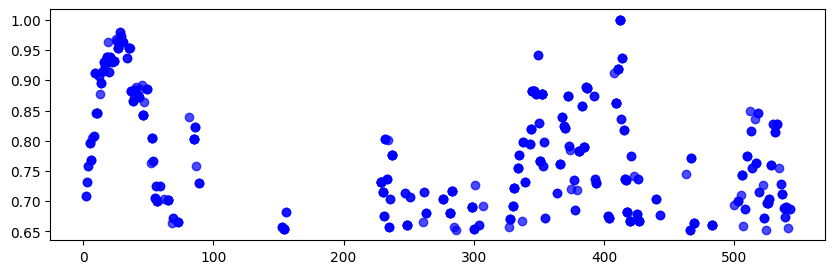

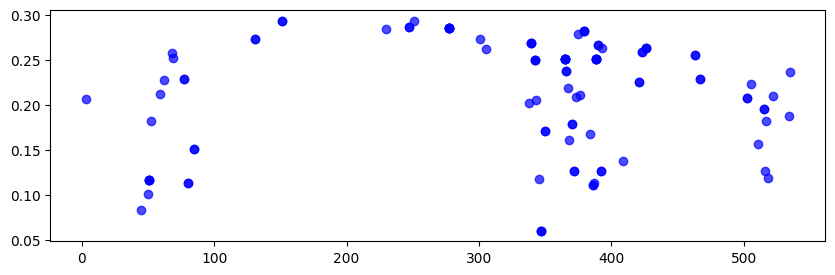

In [ ]:
high_confidence_predictions = pten[pten['overall_confidence'] >=0.65]
high_positions =  high_confidence_predictions['position'].tolist()
high_positions = [int(x) for x in high_positions]

low_confidence_predictions = pten[pten['overall_confidence'] < 0.3]
low_positions =  low_confidence_predictions['position'].tolist()
low_positions = [int(x) for x in low_positions]

plt.rcParams["figure.figsize"] = (10,3)
plt.scatter(high_positions, high_confidence_predictions['overall_confidence'], label = 'high overall_confidence', c='b', alpha=0.7)
plt.show()
plt.rcParams["figure.figsize"] = (10,3)
plt.scatter(low_positions, low_confidence_predictions['overall_confidence'], label = 'low overall_confidence', c='b', alpha=0.7)
plt.show()

In [ ]:
high_confidence_predictions['pos'] = pd.to_numeric(high_confidence_predictions['position'],errors='coerce')
test_high = high_confidence_predictions.sort_values(by='position', ascending=True)

<ipython-input-28-108ab86bbbda>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.scatter(test_high, x='pos', y='D2D_prediction',
                 color =  test_high['lab_clinvar'],
                 symbol = test_high['lab_clinvar'],
                 symbol_sequence= ['circle-open', 'circle','circle-open'],
                 color_discrete_sequence = ['#82AAE3' , '#82AAE3','#ffa7b1' ], opacity = 0.85, width =850, height =400,  hover_data=['conc_mutation', 'D2D_prediction' ])


# Change the bar mode
fig.update_layout(barmode='group', title="CHEK2 Gene ",
    xaxis_title="Position",
    yaxis_title="D2D prediction",
    font_family="Arial",
    legend_title="Groundtruth",
    title_font_family="Arial")

fig.update_layout({
'plot_bgcolor': 'rgba(255, 255, 255, 255)' ,
'paper_bgcolor': 'rgba(255, 255, 255, 255)',
})

fig.show()

#### AR

In [ ]:
tp53 = all_predictions_labels[all_predictions_labels['uniprot id'] == 'P10275']
tp53_labelled = labelled[labelled['uniprot id'] == 'P10275']

correct =tp53_labelled['correct_label'].sum()
print(f'Correct labels for AR: { round(correct)} out of {len(tp53_labelled)} with known significance. Accuracy: {round(correct/ len(tp53_labelled),3)}')
print('--------------------------')
print('Inorrect labels for AR: ', len(tp53_labelled[tp53_labelled['correct_label'] == 0]))
print('--------------------------')
print(f'VUS labels for AR: {len(tp53) - len(tp53_labelled)}, VUS percentage in gene annotations {round(len(tp53) - len(tp53_labelled)/len(tp53),3)}')

Correct labels for AR: 100 out of 116 with known significance. Accuracy: 0.862
--------------------------
Inorrect labels for AR:  16
--------------------------
VUS labels for AR: 67, VUS percentage in gene annotations 182.366


In [ ]:
correct, incorrect, vus_nb, count_mutations, incorrect_mutation, correct_mutation, predictions_clinvar_labels = d2d_performance_vs_clinvar_labels_correct(ar_predictions, ar_clinvar, False)
predictions_clinvar_labels['pos'] = pd.to_numeric(predictions_clinvar_labels['position'],errors='coerce')
test= predictions_clinvar_labels.sort_values(by='position', ascending=True)

Streaming output truncated to the last 5000 lines.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-dd273f8dabf2>:111: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-dd273f8dabf2>:112: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-dd273f8dabf2>:114: FutureWarning:

The frame.append method is deprecated and will b

Weigthed Accuracy

In [ ]:
weighted_sum = (tp53_labelled['overall_confidence'] * tp53_labelled['correct_label']).sum()
total_weight = tp53_labelled['overall_confidence'].sum()
weighted_average = weighted_sum / total_weight
print(weighted_average)

0.9037071487777327


In [ ]:
fig = px.scatter(test, x='pos', y='D2D_prediction',
                 color =  test['lab_clinvar'],
                 symbol = test['lab_clinvar'],
                 symbol_sequence= ['circle','circle','circle', 'circle-open','circle', 'circle-open'],
                 color_discrete_sequence = ['#ffa7b1' ,'#82AAE3' ,'#ed5564', '#ffa7b1', 'blue'  ,'#ffa7b1'], opacity = 0.85, width =850, height =400,  hover_data=['conc_mutation', 'D2D_prediction' ])

# Change the bar mode
fig.update_layout(barmode='group', title="AR Gene ",
    xaxis_title="Position",
    yaxis_title="D2D prediction",
    font_family="Arial",
    legend_title="Groundtruth",
    title_font_family="Arial")

fig.update_layout({
'plot_bgcolor': 'rgba(255, 255, 255, 255)' ,
'paper_bgcolor': 'rgba(255, 255, 255, 255)',
})

fig.show()

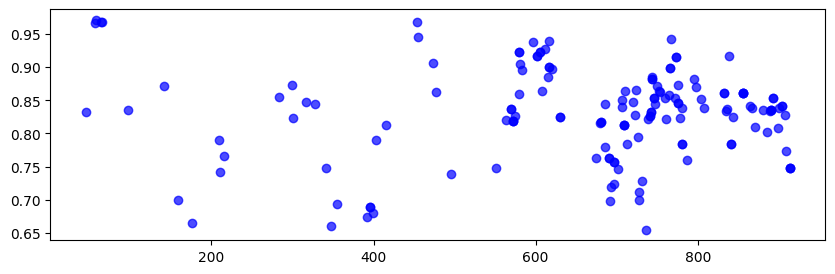

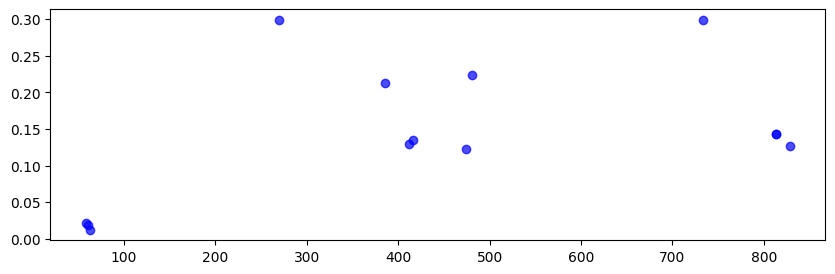

In [ ]:
high_confidence_predictions = tp53[tp53['overall_confidence'] >=0.65]
high_positions =  high_confidence_predictions['position'].tolist()
high_positions = [int(x) for x in high_positions]

low_confidence_predictions = tp53[tp53['overall_confidence'] < 0.3]
low_positions =  low_confidence_predictions['position'].tolist()
low_positions = [int(x) for x in low_positions]

plt.rcParams["figure.figsize"] = (10,3)
plt.scatter(high_positions, high_confidence_predictions['overall_confidence'], label = 'high overall_confidence', c='b', alpha=0.7)
plt.show()
plt.rcParams["figure.figsize"] = (10,3)
plt.scatter(low_positions, low_confidence_predictions['overall_confidence'], label = 'low overall_confidence', c='b', alpha=0.7)
plt.show()

In [ ]:
high_confidence_predictions['pos'] = pd.to_numeric(high_confidence_predictions['position'],errors='coerce')
test_high = high_confidence_predictions.sort_values(by='position', ascending=True)

<ipython-input-41-108ab86bbbda>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
fig = px.scatter(test_high, x='pos', y='D2D_prediction',
                 color =  test_high['lab_clinvar'],
                 symbol = test_high['lab_clinvar'],
                 symbol_sequence= ['circle','circle','circle', 'circle-open','circle', 'circle-open'],
                 color_discrete_sequence = ['#82AAE3' ,'#ed5564' ,'blue', '#82AAE3', '#ffa7b1'  ,'#ffa7b1'], opacity = 0.85, width =850, height =400,  hover_data=['conc_mutation', 'D2D_prediction' ])


# Change the bar mode
fig.update_layout(barmode='group', title="AR Gene ",
    xaxis_title="Position",
    yaxis_title="D2D prediction",
    font_family="Arial",
    legend_title="Groundtruth",
    title_font_family="Arial")

fig.update_layout({
'plot_bgcolor': 'rgba(255, 255, 255, 255)' ,
'paper_bgcolor': 'rgba(255, 255, 255, 255)',
})

fig.show()